In [1]:
%load_ext Cython

In [2]:
%%cython
from draculab import *

In [3]:
import matplotlib.pyplot as plt
import numpy as np
#from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from numpy import sin, cos
%matplotlib notebook
import time

In [4]:
## SETTING THE NETWORK ##

class spinal_cord():
    
    def antagonist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1,
                          alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the antagonist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_r_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_r_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_r_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_r_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def antagonist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                               alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
                         self.alpha_muscle1_2_r_muscle1_syn_spec)
        self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
                                  self.alpha_muscle1_2_arm_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
                         self.r_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
                         self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle1, r_muscle2, self.r_muscle1_2_r_muscle2_conn_spec, 
                         self.r_muscle1_2_r_muscle2_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
                                   self.arm_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
                                   self.arm_2_pn_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
                                   self.arm_2_ia_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
                                   self.arm_2_ib_muscle1_syn_spec)

        self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
                         self.alpha_muscle2_2_r_muscle2_syn_spec)
        self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
                                  self.alpha_muscle2_2_arm_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
                         self.r_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
                         self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle2, r_muscle1, self.r_muscle2_2_r_muscle1_conn_spec, 
                         self.r_muscle2_2_r_muscle1_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
                                   self.arm_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
                                   self.arm_2_pn_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
                                   self.arm_2_ia_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
                                   self.arm_2_ib_muscle2_syn_spec)

    def synergist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1, 
                         alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the synergist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = exc_aff_syn
        self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_r_muscle2_syn_spec = exc_aff_syn
        self.ib_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = exc_aff_syn
        self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_r_muscle1_syn_spec = exc_aff_syn
        self.ib_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_r_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_r_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def synergist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                              alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
                         self.alpha_muscle1_2_r_muscle1_syn_spec)
        self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
                                  self.alpha_muscle1_2_arm_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
                         self.r_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
                         self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle1, r_muscle2, self.r_muscle1_2_r_muscle2_conn_spec, 
                         self.r_muscle1_2_r_muscle2_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
                                   self.arm_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
                                   self.arm_2_pn_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
                                   self.arm_2_ia_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
                                   self.arm_2_ib_muscle1_syn_spec)

        self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
                         self.alpha_muscle2_2_r_muscle2_syn_spec)
        self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
                                  self.alpha_muscle2_2_arm_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
                         self.r_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
                         self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle2, r_muscle1, self.r_muscle2_2_r_muscle1_conn_spec, 
                         self.r_muscle2_2_r_muscle1_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
                                   self.arm_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
                                   self.arm_2_pn_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
                                   self.arm_2_ia_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
                                   self.arm_2_ib_muscle2_syn_spec)
    
    def partial_synergist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1, 
                                 alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the partial synergist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Selective afferent synapse dictionary
        sel_aff_syn = {'init_w' : {'distribution':'uniform', 'low':-2, 'high':2},
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ib_muscle1_2_ib_muscle2_syn_spec = sel_aff_syn
        self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ib_muscle2_2_ib_muscle1_syn_spec = sel_aff_syn
        self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle1_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_ib_muscle2_conn_spec = conn_spec
        self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle2_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_ib_muscle1_conn_spec = conn_spec
        self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def partial_synergist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                                      alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
                         self.alpha_muscle1_2_r_muscle1_syn_spec)
        self.net.connect(alpha_muscle1, r_muscle2, self.alpha_muscle1_2_r_muscle2_conn_spec, 
                         self.alpha_muscle1_2_r_muscle2_syn_spec)
        self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
                                  self.alpha_muscle1_2_arm_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
                         self.r_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
                         self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle2, self.r_muscle1_2_alpha_muscle2_conn_spec, 
                         self.r_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle1, ib_muscle2, self.ib_muscle1_2_ib_muscle2_conn_spec, 
                         self.ib_muscle1_2_ib_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
                                   self.arm_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
                                   self.arm_2_pn_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
                                   self.arm_2_ia_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
                                   self.arm_2_ib_muscle1_syn_spec)

        self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
                         self.alpha_muscle2_2_r_muscle2_syn_spec)
        self.net.connect(alpha_muscle2, r_muscle1, self.alpha_muscle2_2_r_muscle1_conn_spec, 
                         self.alpha_muscle2_2_r_muscle1_syn_spec)
        self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
                                  self.alpha_muscle2_2_arm_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
                         self.r_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
                         self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle1, self.r_muscle2_2_alpha_muscle1_conn_spec, 
                         self.r_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle2, ib_muscle1, self.ib_muscle2_2_ib_muscle1_conn_spec, 
                         self.ib_muscle2_2_ib_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
                                   self.arm_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
                                   self.arm_2_pn_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
                                   self.arm_2_ia_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
                                   self.arm_2_ib_muscle2_syn_spec)
    
    def __init__(self):
        
    ########### Fixing random seed
    
        self.seed = 19680801
        np.random.seed(self.seed)
        
    ########### Create parameter dictionaries for network, plant, and units
    
        # Defining network parameters
        self.net_params = {'min_delay': 0.005,
                           'min_buff_size': 10}

        # Defining neurons' parameters
        
        # Neurons' dictionary
        neuron_params = {'type' : unit_types.presyn_inh_sig,
                         'init_val' : 0.,
                         'thresh' : .5,
                         'slope' : 11.,
                         'tau' : 0.02,
                         'HYP' : 2.,
                         'OD' : 2.}
        ia_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 3.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        alpha_params = {'type' : unit_types.presyn_inh_sig,
                        'init_val' : 0.,
                        'thresh' : 0.8,
                        'slope' : 5.,
                        'tau' : 0.02,
                        'HYP' : 2.,
                        'OD' : 2.}
        ib_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 2.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        pn_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 3.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        
        
        # Muscle 1 neurons
        self.alpha_1_params = alpha_params
        self.pn_1_params = pn_params
        self.ia_1_params = ia_params
        self.r_1_params = neuron_params
        self.ib_1_params = ib_params
        
        # Muscle 2 neurons
        self.alpha_2_params = alpha_params
        self.pn_2_params = pn_params
        self.ia_2_params = ia_params
        self.r_2_params = neuron_params
        self.ib_2_params = ib_params
        
        # Muscle 3 neurons
        self.alpha_3_params = alpha_params
        self.pn_3_params = pn_params
        self.ia_3_params = ia_params
        self.r_3_params = neuron_params
        self.ib_3_params = ib_params
        
        # Muscle 4 neurons
        self.alpha_4_params = alpha_params
        self.pn_4_params = pn_params
        self.ia_4_params = ia_params
        self.r_4_params = neuron_params
        self.ib_4_params = ib_params
        
        # Muscle 5 neurons
        self.alpha_5_params = alpha_params
        self.pn_5_params = pn_params
        self.ia_5_params = ia_params
        self.r_5_params = neuron_params
        self.ib_5_params = ib_params
        
        # Muscle 6 neurons
        self.alpha_6_params = alpha_params
        self.pn_6_params = pn_params
        self.ia_6_params = ia_params
        self.r_6_params = neuron_params
        self.ib_6_params = ib_params

        # Defining arm parameters
        self.arm_params = {'type': plant_models.planar_arm_v3,
                           'mass1': 1.,
                           'mass2': 1.,
                           'init_q1': 0.,
                           'init_q2': np.pi/2.,
                           'init_q1p': 0.,
                           'init_q2p': 0.,
                           'g': 0.0,
                           'mu1': 0.01,
                           'mu2': 0.01,
                           
                           #'s_min' : -0.4,
                           #'p1' : (-0.01, 0.04),
                           #'p2' : (0.29, 0.03),
                           #'p3' : (0., 0.05),
                           #'p5' : (0.01, -0.05),
                           #'p10': (0.29, 0.03),
                           #'l_torque' : 0.01,
                           #'l_visco' : 0.01,
                           'g_e' : 20.,
                           #'l0_e' : [1.]*6,
                           #'Ia_gain' : 2.5*np.array([3.,10.,10., 3.,10.,10.]),
                           #'II_gain' : 2.*np.array([3., 8., 8., 3., 8., 8.]),
                           #'Ib_gain' : 5.,
                           #'T_0' : .5,
                           'k_pe_e' : 8,
                           'k_se_e' : 13,
                           #'b_e' : 5.,
                           #'g_s' : 0.02,
                           #'k_pe_s' : 2., 
                           #'k_se_s' : 2.,
                           #'g_d' : 0.01,
                           #'k_pe_d' : .2, #.1,
                           #'k_se_d' : 1., #2.,
                           #'b_s' : .5,
                           #'b_d' : 2.,#3.,
                           #'l0_s': .7,
                           #'l0_d': .8,
                           #'fs' : 0.1,
                           #'se_II' : 0.5,
                           #'cd' : 0.5,
                           #'cs' : 0.5
                           
                           }
        
        # Defining sources' parameters
        self.source_params = {'init_val' : 1.,
                              'type' : unit_types.source,
                              'function' : lambda x: 1.}
        
    ########### Create parameter dictionaries for the synapses and connections
    
        '''    
        # Defining synapses' and connections' specifications to neurons and plant
        
        ## Antagonist connections
        # Muscle 1 - muscle 4
        self.antagonist_params(0, 5, 6, 7, 9, 17, 18, 19)
        # Muscle 2 - muscle 3
        self.antagonist_params(3, 9, 10, 11, 6, 13, 14, 15)
        # Muscle 5 - muscle 6
        self.antagonist_params(12, 21, 22, 23, 15, 25, 26, 27)
        
        ## Synergist connections
        # Muscle 1 - muscle 2
        self.synergist_params(0, 5, 6, 7, 3, 9, 10, 11)
        # Muscle 1 - muscle 5
        self.synergist_params(0, 5, 6, 7, 12, 21, 22, 23)
        # Muscle 4 - muscle 3
        self.synergist_params(9, 17, 18, 19, 6, 13, 14, 15)
        # Muscle 4 - muscle 6
        self.synergist_params(9, 17, 18, 19, 15, 25, 26, 27)
        
        ## Partial synergist connections
        # Muscle 2 - muscle 5
        self.partial_synergist_params(3, 9, 10, 11, 12, 21, 22, 23)
        # Muscle 2 - muscle 6
        self.partial_synergist_params(3, 9, 10, 11, 15, 25, 26, 27)
        # Muscle 3 - muscle 5
        self.partial_synergist_params(6, 13, 14, 15, 12, 21, 22, 23)
        # Muscle 3 - muscle 6
        self.partial_synergist_params(6, 13, 14, 15, 15, 25, 26, 27)
        '''
        
        # Defining synapses' specifications to source units

        # PC synapse dictionary
        self.pc_syn = {'init_w' : {'distribution':'uniform', 'low':-0.2, 'high':0.2},
                       'type' : synapse_types.static,
                       'inp_ports' : [1]}
        # IC synapse dictionary
        self.ic_syn = {'init_w' : {'distribution':'uniform', 'low':-0.2, 'high':0.2},
                       'type' : synapse_types.static,
                       'inp_ports' : [2, 2, 2, 2]}   
        
        # Defining connections' specifications to source units

        # PC Connection dictionary
        self.pc_conn_spec = {'rule' : 'one_to_one',
                             'delay' : 0.005}
        # IC connection dictionary 
        self.ic_conn_spec = {'rule' : 'all_to_all',
                             'delay' : 0.005}
        
    def initialize(self):
        
        np.random.seed(self.seed)
        
    ########### Create network, neurons and plant

        self.net = network(self.net_params)
        
        alpha_1 = self.net.create(1, self.alpha_1_params)
        pn_1 = self.net.create(1, self.pn_1_params)
        ia_1 = self.net.create(1, self.ia_1_params)
        r_1 = self.net.create(1, self.r_1_params)
        ib_1 = self.net.create(1, self.ib_1_params)
        self.m1_ids = alpha_1 + pn_1 + ia_1 + r_1 + ib_1
        
        alpha_2 = self.net.create(1, self.alpha_2_params)
        pn_2 = self.net.create(1, self.pn_2_params)
        ia_2 = self.net.create(1, self.ia_2_params)
        r_2 = self.net.create(1, self.r_2_params)
        ib_2 = self.net.create(1, self.ib_2_params)
        self.m2_ids = alpha_2 + pn_2 + ia_2 + r_2 + ib_2
        
        alpha_3 = self.net.create(1, self.alpha_3_params)
        pn_3 = self.net.create(1, self.pn_3_params)
        ia_3 = self.net.create(1, self.ia_3_params)
        r_3 = self.net.create(1, self.r_3_params)
        ib_3 = self.net.create(1, self.ib_3_params)
        self.m3_ids = alpha_3 + pn_3 + ia_3 + r_3 + ib_3
        
        alpha_4 = self.net.create(1, self.alpha_4_params)
        pn_4 = self.net.create(1, self.pn_4_params)
        ia_4 = self.net.create(1, self.ia_4_params)
        r_4 = self.net.create(1, self.r_4_params)
        ib_4 = self.net.create(1, self.ib_4_params)
        self.m4_ids = alpha_4 + pn_4 + ia_4 + r_4 + ib_4
        
        alpha_5 = self.net.create(1, self.alpha_5_params)
        pn_5 = self.net.create(1, self.pn_5_params)
        ia_5 = self.net.create(1, self.ia_5_params)
        r_5 = self.net.create(1, self.r_5_params)
        ib_5 = self.net.create(1, self.ib_5_params)
        self.m5_ids = alpha_5 + pn_5 + ia_5 + r_5 + ib_5
        
        alpha_6 = self.net.create(1, self.alpha_6_params)
        pn_6 = self.net.create(1, self.pn_6_params)
        ia_6 = self.net.create(1, self.ia_6_params)
        r_6 = self.net.create(1, self.r_6_params)
        ib_6 = self.net.create(1, self.ib_6_params)
        self.m6_ids = alpha_6 + pn_6 + ia_6 + r_6 + ib_6
        
        self.arm = self.net.create(1, self.arm_params)

    ########### Connect
    
        #Creating lists with port numbers
        alpha_port = range(0,6)
        ia_port = range(28,34)
        ii_port = range(34,40)
        ib_port = range(22,28)
    
        ## Antagonist connections
        # Muscle 1 - muscle 4
        self.antagonist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[3], ia_port[3], 
                               ii_port[3], ib_port[3])
        #self.antagonist_params(0, 28, 34, 22, 3, 31, 37, 25)
        self.antagonist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_4, ia_4, ib_4, pn_4, r_4)
        # Muscle 2 - muscle 3
        self.antagonist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[2], ia_port[2], 
                               ii_port[2], ib_port[2])
        #self.antagonist_params(1, 29, 35, 23, 2, 30, 36, 24)
        self.antagonist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_3, ia_3, ib_3, pn_3, r_3)
        # Muscle 5 - muscle 6
        self.antagonist_params(alpha_port[4], ia_port[4], ii_port[4], ib_port[4], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.antagonist_params(4, 32, 38, 26, 5, 33, 39, 27)
        self.antagonist_connections(alpha_5, ia_5, ib_5, pn_5, r_5, alpha_6, ia_6, ib_6, pn_6, r_6)
        
        ## Synergist connections
        # Muscle 1 - muscle 2
        self.synergist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[1], ia_port[1], 
                               ii_port[1], ib_port[1])
        #self.synergist_params(0, 28, 34, 22, 1, 29, 35, 23)
        self.synergist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_2, ia_2, ib_2, pn_2, r_2)
        # Muscle 1 - muscle 5
        self.synergist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.synergist_params(0, 28, 34, 22, 4, 32, 38, 26)
        self.synergist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 4 - muscle 3
        self.synergist_params(alpha_port[3], ia_port[3], ii_port[3], ib_port[3], alpha_port[2], ia_port[2], 
                               ii_port[2], ib_port[2])
        #self.synergist_params(3, 31, 37, 25, 2, 30, 36, 24)
        self.synergist_connections(alpha_4, ia_4, ib_4, pn_4, r_4, alpha_3, ia_3, ib_3, pn_3, r_3)
        # Muscle 4 - muscle 6
        self.synergist_params(alpha_port[3], ia_port[3], ii_port[3], ib_port[3], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.synergist_params(3, 31, 37, 25, 5, 33, 39, 27)
        self.synergist_connections(alpha_4, ia_4, ib_4, pn_4, r_4, alpha_6, ia_6, ib_6, pn_6, r_6)
        
        ## Partial synergist connections
        # Muscle 2 - muscle 5
        self.partial_synergist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.partial_synergist_params(1, 29, 35, 23, 4, 32, 38, 26)
        self.partial_synergist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 2 - muscle 6
        self.partial_synergist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.partial_synergist_params(1, 29, 35, 23, 5, 33, 39, 27)
        self.partial_synergist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_6, ia_6, ib_6, pn_6, r_6)
        # Muscle 3 - muscle 5
        self.partial_synergist_params(alpha_port[2], ia_port[2], ii_port[2], ib_port[2], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.partial_synergist_params(2, 30, 36, 24, 4, 32, 38, 26)
        self.partial_synergist_connections(alpha_3, ia_3, ib_3, pn_3, r_3, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 3 - muscle 6
        self.partial_synergist_params(alpha_port[2], ia_port[2], ii_port[2], ib_port[2], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.partial_synergist_params(2, 30, 36, 24, 5, 33, 39, 27)
        self.partial_synergist_connections(alpha_3, ia_3, ib_3, pn_3, r_3, alpha_6, ia_6, ib_6, pn_6, r_6)
    
    ########### Create PC source units and connect
    
        for unit in self.net.units:
            uid = unit.ID
            for syn in range(len(self.net.syns[uid])):
                src = self.net.create(1, self.source_params)
                self.net.connect(src, [uid], self.pc_conn_spec, self.pc_syn)
                
    ########### Create IC source unit and connect

        self.ic_source = self.net.create(1, self.source_params)
        self.net.connect(self.ic_source, self.m1_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m2_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m3_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m4_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m5_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m6_ids[1:], self.ic_conn_spec, self.ic_syn)
        
    ########### Create source units to track the insertion points and tensions of the arm muscles
    
        track_params = {'type': unit_types.source,
                        'init_val': 0.,
                        'function' : lambda x: 0.}
        
        # create source units to track the insertion points
        self.ipx_track = self.net.create(12, track_params) # x coordinates
        self.ipy_track = self.net.create(12, track_params) # y coordinates
        # create source units to track the tensions
        #self.ten_track = self.net.create(6, track_params)

        for idx, uid in enumerate(self.ipx_track):
            self.net.units[uid].set_function(self.create_xtracker(self.arm, idx))
        for idx, uid in enumerate(self.ipy_track):
            self.net.units[uid].set_function(self.create_ytracker(self.arm, idx))
        #for idx, uid in enumerate(self.ten_track):
            #self.net.units[uid].set_function(self.create_tentracker(self.arm, idx))
            
    def create_xtracker(self, arm_id, idx):
        return lambda t: self.net.plants[arm_id].ip[idx][0]

    def create_ytracker(self, arm_id, idx):
        return lambda t: self.net.plants[arm_id].ip[idx][1]

    #def create_tentracker(self, arm_id, idx):
        #return lambda t: self.net.plants[arm_id].muscles[idx].T
        
    def simulate(self, sim_time, flat=True):
    ########### Simulate
    
        if flat:
            self.sim_dat = self.net.flat_run(sim_time)
        else:
            self.sim_dat = self.net.run(sim_time)
        self.arm_activs = np.array(self.sim_dat[2][self.arm])
        
        #print(self.sim_dat[1][self.alpha_1[0]])
        #print(self.arm_activs[:,0])
        #print(len(self.net.syns[self.ib_4[0]]))
        
    def neuron_activity(self):    
    # Plot of neurons' activity

        fig = plt.figure(figsize=(18,8))
        fig.add_subplot(231)
        m_label = ["alpha", "PN", "Ia", "R", "Ib"]
        m1_label = [s + " m1" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m1_ids[i]])
        plt.legend(m1_label, loc="lower right", ncol=1)
        fig.add_subplot(232)
        m2_label = [s + " m2" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m2_ids[i]])
        plt.legend(m2_label, loc="lower right", ncol=1)
        fig.add_subplot(233)
        m3_label = [s + " m3" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m3_ids[i]])
        plt.legend(m3_label, loc="lower right", ncol=1)
        fig.add_subplot(234)
        m4_label = [s + " m4" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m4_ids[i]])
        plt.legend(m4_label, loc="lower right", ncol=1)
        fig.add_subplot(235)
        m5_label = [s + " m5" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m5_ids[i]])
        plt.legend(m5_label, loc="lower right", ncol=1)
        fig.add_subplot(236)
        m6_label = [s + " m6" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m6_ids[i]])
        plt.legend(m6_label, loc="lower right", ncol=1)
        plt.show()
        
    def arm_activity(self): 
    # Plot the state variables of the arm
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Shoulder angle (rad)', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], (self.arm_activs[:,0]+np.pi)%(2.*np.pi)-np.pi, 'b', linewidth=lw)
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Shoulder ang vel [rad/s]', fontsize='xx-large')
        ax0b.plot(self.sim_dat[0], self.arm_activs[:,1], 'r', linewidth=lw)
        ax0b.tick_params(labelsize=ls)
        ax0c = fig.add_axes([0.01, .44, .99, 0.16 ])
        ax0c.set_ylabel('Elbow angle (rad)', fontsize='xx-large')
        ax0c.tick_params(labelsize=ls)
        ax0c.plot(self.sim_dat[0], (self.arm_activs[:,2]+np.pi)%(2.*np.pi)-np.pi, 'b', linewidth=lw)
        ax0d = fig.add_axes([0.01, .28, .99, 0.16 ])
        ax0d.set_xlabel('time [s]', fontsize='xx-large') 
        ax0d.set_ylabel('Elbow ang vel [rad/s]', fontsize='xx-large')
        ax0d.plot(self.sim_dat[0], self.arm_activs[:,3], 'r', linewidth=lw)
        ax0d.tick_params(labelsize=ls)
        plt.show()
        
    def arm_afferent_output(self):
    # Plot the arm's afferent outputs
        fig = plt.figure(figsize=(18,17))
        fig.add_subplot(311)
        m_label = ["m1", "m2", "m3", "m4", "m5", "m6"]
        Ia_label = ["Ia afferent " + s for s in m_label]
        for i in range(28, 34):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(Ia_label, loc="lower right", ncol=1)
        fig.add_subplot(312)
        II_label = ["II afferent " + s for s in m_label]
        for i in range(34, 40):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(II_label, loc="lower right", ncol=1)
        fig.add_subplot(313)
        Ib_label = ["Ib afferent " + s for s in m_label]
        for i in range(22, 28):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(Ib_label, loc="lower right", ncol=1)
        plt.show()
        
        
    def arm_coord(self,des_coord_x,des_coord_y): 
    # Plot the hand coordinates of the arm 
    
        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # coordinates of hand
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xh = cos(theta_s)*l1 + cos(phi)*l2
        yh = sin(theta_s)*l1 + sin(phi)*l2
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Hand coordinate x', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], xh, 'b', linewidth=lw)
        ax0a.plot(self.sim_dat[0], [des_coord_x]*len(self.sim_dat[0]), 'k', linewidth=1)
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Hand coordinate y', fontsize='xx-large')
        ax0b.tick_params(labelsize=ls)
        ax0b.plot(self.sim_dat[0], yh, 'r', linewidth=lw)
        ax0b.plot(self.sim_dat[0], [des_coord_y]*len(self.sim_dat[0]), 'k', linewidth=1)
        plt.show()
        
    def arm_trajectory(self,targ_coord_x,targ_coord_y,sim_time): 
    # Plot the hand trajectory 
    
        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # coordinates of hand
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xh = cos(theta_s)*l1 + cos(phi)*l2
        yh = sin(theta_s)*l1 + sin(phi)*l2
        
        des_coord_x = []
        des_coord_y = []
        tr = sim_time - 1.
        init_coord = np.array([0.3, 0.3])
        targ_coord = np.array([targ_coord_x, targ_coord_y])
        v = targ_coord - init_coord
        D = np.linalg.norm(v) + 1e-32
        u = v / D
        for tid,time in enumerate(self.sim_dat[0]):   
            # desired coordinates of hand
            dist = self.targ_dist(time, tr, D) 
            des_coord = init_coord + dist*u
            des_coord_x.append(des_coord[0])
            des_coord_y.append(des_coord[1])
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Hand coordinate x', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], xh, 'b', linewidth=lw)
        ax0a.plot(self.sim_dat[0], des_coord_x, 'b--', linewidth=lw)
        ax0a.set(ylim=(0, 0.5))
        ax0a.legend(['Actual trajectory','Desired trajectory'], loc="lower right", ncol=1, fontsize = 'large')
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Hand coordinate y', fontsize='xx-large')
        ax0b.tick_params(labelsize=ls)
        ax0b.plot(self.sim_dat[0], yh, 'r', linewidth=lw)
        ax0b.plot(self.sim_dat[0], des_coord_y, 'r--', linewidth=lw)
        ax0b.set(ylim=(0, 0.5))
        ax0b.legend(['Actual trajectory','Desired trajectory'], loc="lower right", ncol=1, fontsize = 'large')
        plt.show()
        
    def arm_animation(self):    
    # Animation of the arm and muscles

        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # data from tracking units
        acts = np.array(self.sim_dat[1])
        ipx = acts[self.ipx_track]
        ipy = acts[self.ipy_track]
        ten = acts[self.ten_track] # muscle tensions
        # coordinates of hand and elbow
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xe = cos(theta_s)*l1
        ye = sin(theta_s)*l1
        xh = xe + cos(phi)*l2
        yh = ye + sin(phi)*l2
        # creating the figure and axis
        fig = plt.figure(figsize=(10,10))
        plt.axis('equal')
        ax = plt.gca()
        lim = l1 + l2
        ax.set_xlim([-lim, lim])
        ax.set_ylim([-lim, lim])
        ax.grid()
        # creating lines and points
        line, = ax.plot([], [], 'o-b', lw=2)
        points, = ax.plot([], [], '+k')
        # preparing a colormap for the tensions
        ten_max = max(ten.max(), 1e-5)
        ten_min = min(ten.min(), -1e-5)
        for row_idx, row in enumerate(ten):
            for ent_idx, entry in enumerate(row):
                if entry > 0:
                    ten[row_idx, ent_idx] = entry/ten_max
                else:
                    ten[row_idx, ent_idx] = entry/abs(ten_min)
        ten = (ten / 2.) + 0.5
        mus_lines = []
        #cmap=plt.get_cmap('Reds')
        #cmap=plt.get_cmap('coolwarm')
        cmap=plt.get_cmap('bwr')
        for i in range(6):
            mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])

        def init(self):
            line.set_data([], [])
            points.set_data([], [])
            for i in range(6):
                mus_lines = []
                mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])
            return line, points, mus_lines

        def update(self, frame):
            coord_x = [0, xe[frame], xh[frame]]
            coord_y = [0, ye[frame], yh[frame]]
            ip_x = ipx[:,frame]
            ip_y = ipy[:,frame]
            tens = ten[:, frame]
            line.set_data(coord_x, coord_y)
            points.set_data(ip_x, ip_y)
            for i, ml in enumerate(mus_lines):
                idx = 2*i
                ml.set_data(ip_x[idx:idx+2], ip_y[idx:idx+2])
                ml.set_color(cmap(tens[i]))

            cur_time = frame*0.01
            fig.suptitle('time: ' + '{:f}'.format(cur_time))
            return line, points, muls_lines #muscle1

        ani = FuncAnimation(fig, update, frames=np.arange(0, len(theta_s), 2), init_func=init, blit=True, 
                            interval=10)
        plt.show()
    
    def w_list(self):
    #Return a list with all synapse weight values in the network, separated by units
        
        w = []
        for unit in self.net.units:
            u_idx = []
            for syn in self.net.syns[unit.ID]:
                u_idx.append(syn.w)
            w.append(u_idx)
            
        return w
        
    def syn_list(self):
    #Return a list with ID's of synapses to test (at ports 1 and 2), separated by units
        
        syn_idx = []
        for unit in self.net.units:
            u_idx = []
            for i,syn in enumerate(self.net.syns[unit.ID]):
                #if syn.port in [1,2]:
                    u_idx.append(i)
            syn_idx.append(u_idx)
            
        return syn_idx
    
    def update_w(self,w):
    #Put the weights (w) in the networks' synapses
        
        #w = self.w_list()
        for uid,unit in enumerate(self.net.units):
            for sid,syn in enumerate(self.net.syns[uid]):
                syn.w = w[uid][sid]
    
    '''
    def calc_error(self,des_coord_x,des_coord_y,sim_time):
    #Calculate the error between the desired coordinate and the average of coordinates of hand in the last 
    #second of simulation
        
        avg_coord_x = 0.
        avg_coord_y = 0.
        count = 0.
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        for tid,time in enumerate(self.sim_dat[0]):
            if time > sim_time-1. :
                # angles of shoulder and elbow
                theta_s = self.arm_activs[:,0][tid]
                theta_e = self.arm_activs[:,2][tid]
                phi = theta_s + theta_e # elbow angle wrt x axis
                # coordinates of hand
                xh = cos(theta_s)*l1 + cos(phi)*l2
                yh = sin(theta_s)*l1 + sin(phi)*l2
                avg_coord_x += xh
                avg_coord_y += yh
                count += 1            
        avg_coord_x /= count
        avg_coord_y /= count
        
        return (des_coord_x - avg_coord_x)**2 + (des_coord_y - avg_coord_y)**2
    '''
    
    def targ_dist(self, time, tr, D):
        """ Target distance between hand and initial position at the given time. """
        return (time/2. - ((tr/(4*np.pi)) *
                           sin((2.*np.pi*time)/tr))) * ((2.*D)/tr)
    
    def calc_error(self,targ_coord_x,targ_coord_y,sim_time):
    #Calculate the error between the desired trajectory of the arm and the actual one
    
        error = 0.
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        tr = sim_time - 1.
        init_coord = np.array([0.3, 0.3])
        targ_coord = np.array([targ_coord_x, targ_coord_y])
        v = targ_coord - init_coord
        D = np.linalg.norm(v) + 1e-32
        u = v / D
        #D = np.sqrt((0.3-tar_coord_x)**2 + (0.3-tar_coord_y)**2)
        #u = np.array([tar_coord_x-0.3, tar_coord_y-0.3])/D
        for tid,time in enumerate(self.sim_dat[0]):   
            # angles of shoulder and elbow
            theta_s = self.arm_activs[:,0][tid]
            theta_e = self.arm_activs[:,2][tid]
            phi = theta_s + theta_e # elbow angle wrt x axis
            # actual coordinates of hand
            xh = cos(theta_s)*l1 + cos(phi)*l2
            yh = sin(theta_s)*l1 + sin(phi)*l2
            h_coord = np.array([xh, yh])
            # desired coordinates of hand
            dist = self.targ_dist(time, tr, D) 
            des_coord = init_coord + dist*u
            
            error += ((des_coord-h_coord)*(des_coord-h_coord)).sum()
        
        return error  
        
    
    def test_weights(self,w_change):
    #Calculate error for each of 3 values of synapse weight in synapse list
    
        #start_time = time.time()
        sim_time = 4.
        des_coord_x = 0.45
        des_coord_y = 0.45
        #w_change = 0.2
        
        w = self.w_list()
        syn_idx = self.syn_list()
        
        #RUN 1
        self.initialize()
        self.update_w(w)
        self.simulate(sim_time)
        error_1 = self.calc_error(des_coord_x,des_coord_y,sim_time)
        
    
        for uid, ulist in enumerate(w):
            print("Initial state. unit %d test syns: " % (uid),end=": ")
            print([syn.w for syn in self.net.syns[uid]])
            for syn in syn_idx[uid]:
                
                #RUN 2
                del(self.net)
                self.initialize()
                self.update_w(w)
                self.net.syns[uid][syn].w += w_change
                self.simulate(sim_time)
                error_2 = self.calc_error(des_coord_x,des_coord_y,sim_time)
                
                #RUN 3
                del(self.net)
                self.initialize()
                self.update_w(w)
                self.net.syns[uid][syn].w -= w_change
                self.simulate(sim_time)
                error_3 = self.calc_error(des_coord_x,des_coord_y,sim_time)
                self.net.syns[uid][syn].w += w_change #ruturn weight to initial value
                
                print("uid:%d, sid:%d, e1:%f, e2:%f, e3:%f" % (uid, syn, error_1, error_2, error_3))
                
                if error_2<error_1 and error_2<error_3:
                    self.net.syns[uid][syn].w += w_change
                    w[uid][syn] += w_change
                    error_1 = error_2
                elif error_3<error_1 and error_3<error_2:
                    self.net.syns[uid][syn].w -= w_change
                    w[uid][syn] -= w_change
                    error_1 = error_3
                print("change. unit %d test syns: " % (uid),end=": ")
                print([syn.w for syn in self.net.syns[uid]])
        
        #print('Execution time: %s seconds' % (time.time() - start_time))
        
        #self.initialize()
        #self.update_w(w)
        #self.simulate(sim_time)
        #print('Error: ' + str(self.calc_error(des_coord_x,des_coord_y,sim_time)))   
        #self.arm_coord(des_coord_x,des_coord_y)
        #self.arm_activity()
        
        return w 
    
    def grad_desc(self):
    #Implement the Gradient Descent Algorithm to synapses' weight
    
        start_time = time.time()
        sim_time = 4.
        des_coord_x = 0.45
        des_coord_y = 0.45
        w_change = [1.0, 1.0, 0.5, 0.5]
        error = self.calc_error(des_coord_x,des_coord_y,sim_time)
        iterat = 0
        
        while error>0.01 and iterat<len(w_change):
            w = self.test_weights(w_change[iterat])
            del(self.net)
            self.initialize()
            self.update_w(w)
            self.simulate(sim_time)
            error = self.calc_error(des_coord_x,des_coord_y,sim_time)
            iterat += 1
            print('Iteration: ' + str(iterat))
            print('Error: ' + str(error))
            print('Execution time: %s seconds' % (time.time() - start_time))
            #self.arm_coord(des_coord_x,des_coord_y)
            #self.arm_activity()
            #self.neuron_activity()
            self.arm_trajectory(des_coord_x,des_coord_y,sim_time)
            self.arm_afferent_output()
            print(w)
            
        #print('Execution time: %s seconds' % (time.time() - start_time))    
        #print('Iterations: ' + str(iterat))
        #print('Error: ' + str(error))
        
        return w
            

In [ ]:
#Initial weights

#w = [[2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677, -0.07032799290797445, 0.16895061296189112, -0.10510942453533022, 0.12957822835567762, 0.10024285613737621, -0.1544862189056053, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.10888920733214047, 0.17086971531721684, 0.04586081089467711, 0.04362550769485979, 0.07387394628298527, -0.0995948130344706, -0.1622398916770107], [-2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 0.13513505471747034, -0.15255375321934372, 0.11889389670608325, 0.17960170699158107, -0.14077484943606247, 0.16274879394561953, 0.115349330181512, 0.10736233653214483, 0.03939859321099051, -0.0037987958821298073], [2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -0.023141752983194153, 0.08921520793190307, -0.03335270022000403, -0.10927584182177, -0.018309063632626188, 0.13917750129811174, 0.04057954870249145], [2.0, 2.0, 2.0, 0.17466237958571407, 0.18241447382919224, -0.04316227373640871, 0.14310981779390508], [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.008336965189399, -2.0, 0.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.19850560781897328, 0.12500128529942484, 0.03309468813889588, -0.13990160743242114, -0.13913057738025497, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, -0.03226856391850261], [-2.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -2.0, 0.004782972871041513, -0.18286755753249107, 0.12251846152391849, -0.10312053403482349, 0.1392844387905734, 0.07823594326208005, -0.05546925411953893, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, -0.14729596148185867], [2.0, -2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.14476227182019624, 0.19121155784678784, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, -0.1727572734521471], [2.0, 2.0, 2.0, 0.8798266669759616, 2.0, 0.4897561346948027, 0.15166716274797148, 0.15976930476652523, -0.17380172706996203, -0.06032921390085569, -0.006484687749538504, 0.10281104693647869, -0.10260679720789488], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.17295757956568547, 2.0, 2.0, -0.8185440755241489, -1.3562164777324401, -2.0, -1.4626984527478322, 2.0, -2.0, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.015057162646764766, -0.03983207161779817, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, -0.08046234356882379], [-2.0, -2.0, 2.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -2.0, 0.1548912476305419, -0.15460361444622409, -0.16422880575419518, -0.16991746606855043, 0.03546805274692438, 0.16278421537102655, -0.0671218383881334, 0.08297567258088245, 0.0672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484], [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.1386834974775626, -0.10201594754602389, -0.07223266013882143, 0.025167504354009995, 0.09831001106748927, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, -0.08971340374189994], [2.0, 2.0, 2.0, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.10636860063173717, 0.01336229134427952, 0.18690169674238694, 0.06255707641454378, 0.1946783537163505, 0.1506487693752137, 0.09638962594040928], [-2.0, -2.0, 2.0, -2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 0.001659219989363775, 0.14248040525543126, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19787000027555113, -0.09627009060385722, -0.026403491636533438], [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0732489960726474, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, -0.08328023348632484], [2.0, 2.0, 2.0, 0.09486501131200953, -0.009611386985856202, -0.04902458883244548, -0.08857752939243176], [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 0.8014692157564789, 0.9710032376503226, -2.0, 0.26698208986846783, 2.0, -2.0, -1.3684665963161868, 2.0, 2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 1.1995981127148587, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, 0.05185509426748264, 0.020453003975285045], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.07986235687947951], [-2.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484, 0.05902133448936586, 0.027779809962282714, 0.03572139821834802], [2.0, -2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132], [2.0, 2.0, 1.911141331298305, 2.0, 0.8861789062132357, 2.0, -0.033006712817969686, 0.11816157437302743, 0.13183067666171794, -0.013810300505924078, -0.07772078096198487, 0.19046872638051077, -0.09106627291137759], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -0.9690222787007161, -0.6338128674265029, -2.0, 0.7780283911173442, 2.0, -2.0, 1.7149654801655982, 2.0, 2.0, -0.6299127464859344, -0.5481228394237365, -2.0, -1.5562255535388942, 2.0, -2.0, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169], [-2.0, -2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, -0.07288220223731129, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, 0.08019989709307007], [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353], [2.0, 2.0, -0.1344669629601949, 2.0, -0.4469436436793255, 2.0, -0.04782619873510843, 0.18999077344393583, -0.05598504586074804, -0.0008997390737044975, -0.03233264259643054, -0.10732439344025663, 0.1468069417529263], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


Execution time: 31.999613285064697 seconds
Error: 66.47494375347864


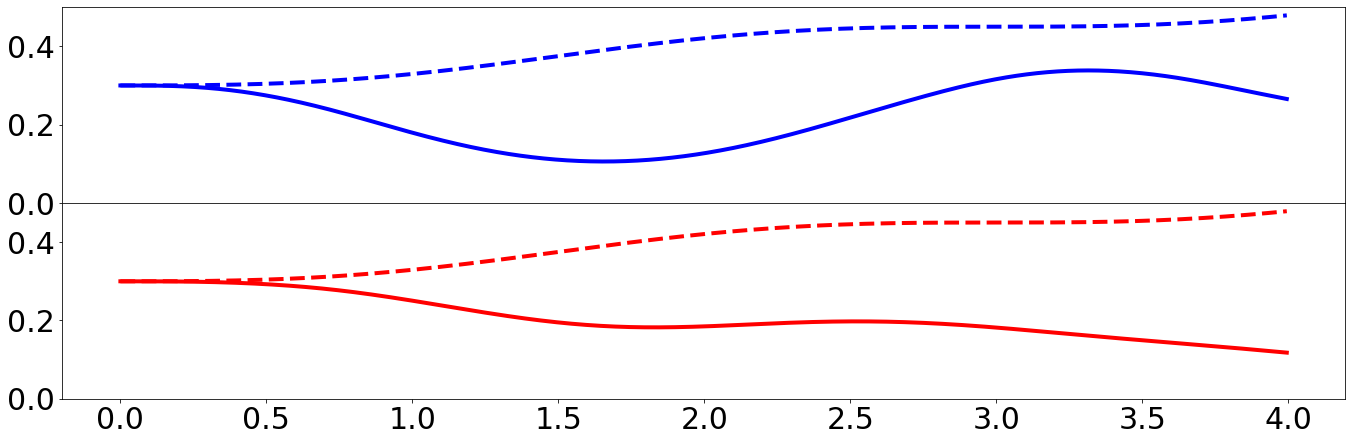

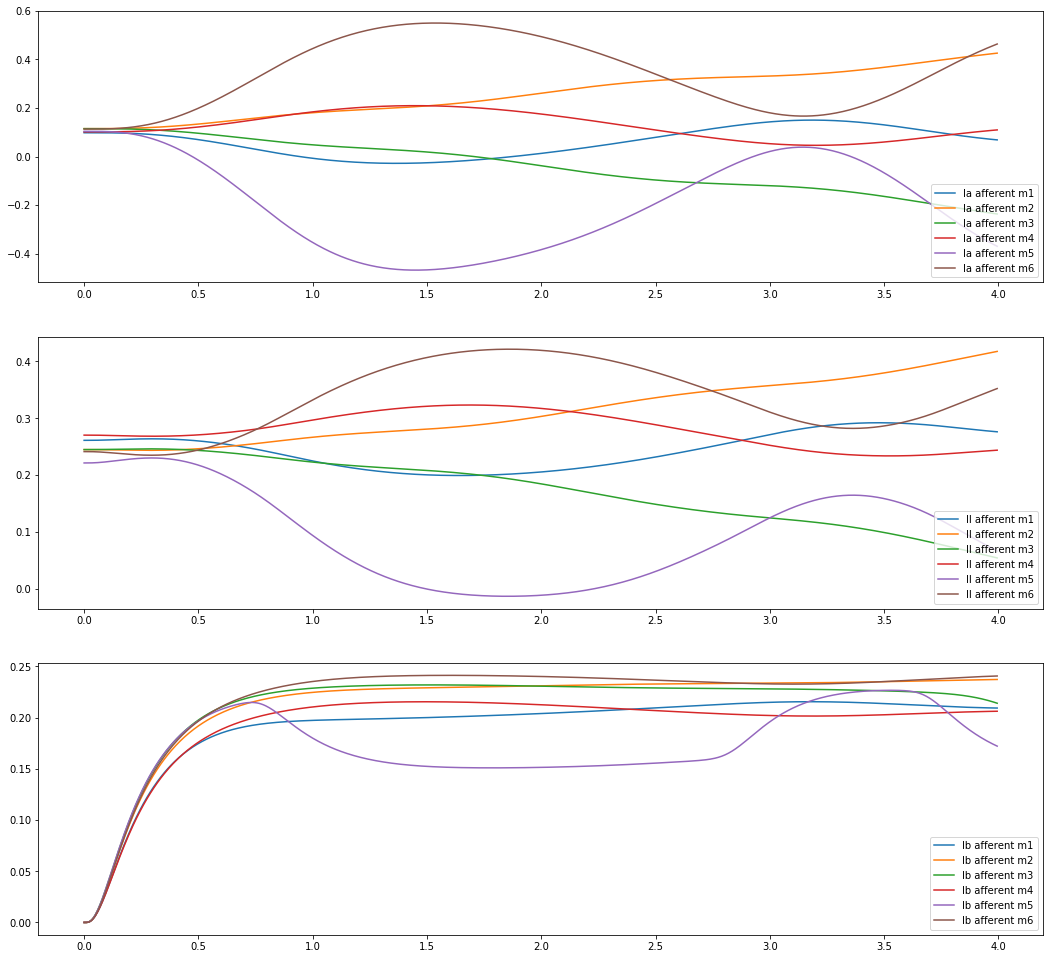

In [5]:
# Creating and runing the simulation

sc = spinal_cord()
start_time = time.time()
sc.initialize()
sc.simulate(4.)
print('Execution time: %s seconds' % (time.time() - start_time))
error = sc.calc_error(0.45,0.45,4.)
print('Error: ' + str(error))
#sc.arm_coord(0.45,0.45)
#sc.arm_activity()
#sc.neuron_activity()
sc.arm_trajectory(0.45,0.45,4.)
sc.arm_afferent_output()

<IPython.core.display.Javascript object>


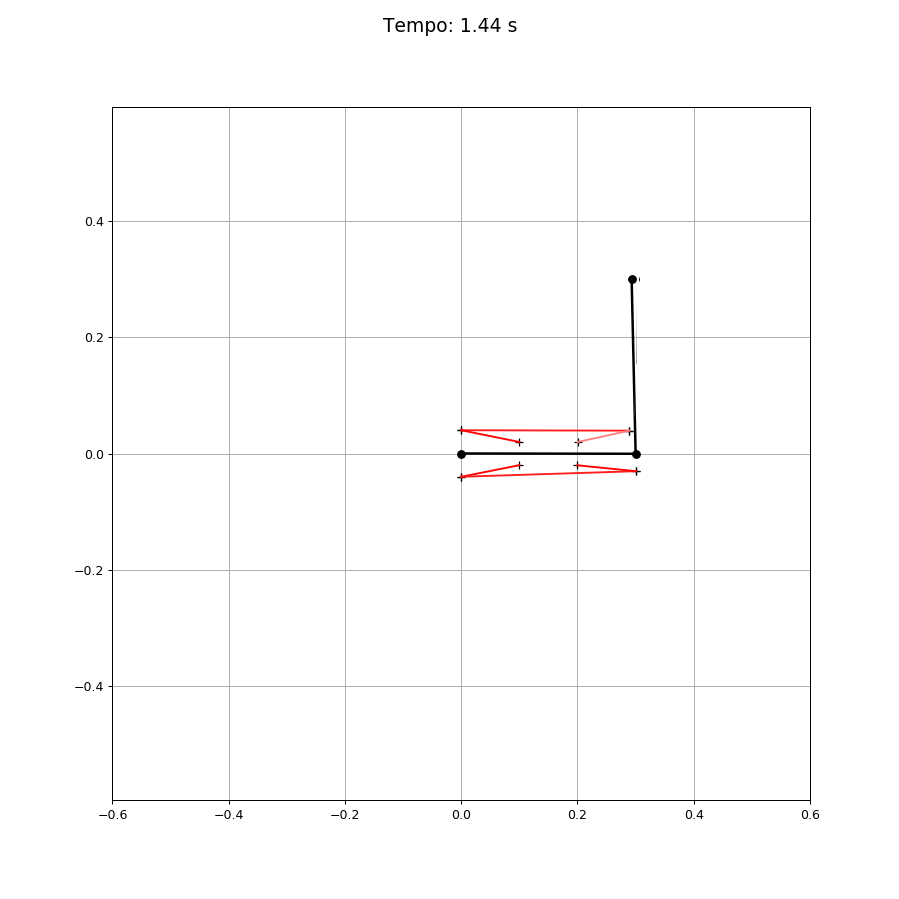

In [9]:
# Animation of the arm and muscles

%matplotlib notebook

# angles of shoulder and elbow
theta_s = sc.arm_activs[:,0]
theta_e = sc.arm_activs[:,2]
phi = theta_s + theta_e # elbow angle wrt x axis
# data from tracking units
acts = np.array(sc.sim_dat[1])
ipx = acts[sc.ipx_track]
ipy = acts[sc.ipy_track]
ten = sc.arm_activs[:,4:10] # muscle tensions
# coordinates of hand and elbow
l1 = sc.net.plants[sc.arm].l_arm
l2 = sc.net.plants[sc.arm].l_farm
xe = cos(theta_s)*l1
ye = sin(theta_s)*l1
xh = xe + cos(phi)*l2
yh = ye + sin(phi)*l2

# Set up formatting for the movie files
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# creating the figure and axis
fig = plt.figure(figsize=(10,10))
plt.axis('equal')
ax = plt.gca()
lim = l1 + l2
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.grid()
# creating lines and points
line, = ax.plot([], [], 'o-k', lw=2)
points, = ax.plot([], [], '+k')
# preparing a colormap for the tensions
ten_max = max(ten.max(), 1e-5)
ten_min = min(ten.min(), -1e-5)
for row_idx, row in enumerate(ten):
    for ent_idx, entry in enumerate(row):
        if entry > 0:
            ten[row_idx, ent_idx] = entry/ten_max
        else:
            ten[row_idx, ent_idx] = entry/abs(ten_min)
ten = (ten / 2.) + 0.5
mus_lines = []
#cmap=plt.get_cmap('Reds')
#cmap=plt.get_cmap('coolwarm')
cmap=plt.get_cmap('bwr')
for i in range(6):
    mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])

def init():
    line.set_data([], [])
    points.set_data([], [])
    for i in range(6):
        mus_lines = []
        mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])
    return line, points, mus_lines

def update(frame):
    coord_x = [0, xe[frame], xh[frame]]
    coord_y = [0, ye[frame], yh[frame]]
    ip_x = ipx[:,frame]
    ip_y = ipy[:,frame]
    tens = ten[frame,:]
    line.set_data(coord_x, coord_y)
    points.set_data(ip_x, ip_y)
    for i, ml in enumerate(mus_lines):
        idx = 2*i
        ml.set_data(ip_x[idx:idx+2], ip_y[idx:idx+2])
        ml.set_color(cmap(tens[i]))

    cur_time = frame*0.005
    fig.suptitle('Tempo: ' + '{:.2f}'.format(cur_time) + ' s', fontsize=15)
    return line, points, mus_lines #muscle1

ani = animation.FuncAnimation(fig, update, frames=np.arange(0, len(theta_s), 2), init_func=init, blit=True, 
                              interval=10)
plt.show()
#ani.save('alvo_03_015.mp4', writer=writer)
#ani.save('alvo_03_015.gif', writer='imagemagick', fps=60)


Initial state. unit 0 test syns: : [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677, -0.07032799290797445, 0.16895061296189112, -0.10510942453533022, 0.12957822835567762, 0.10024285613737621, -0.1544862189056053, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:0, e1:66.474944, e2:66.473842, e3:66.476341
change. unit 0 test syns: : [3.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.0974484538970151

uid:0, sid:11, e1:66.465629, e2:66.465256, e3:66.466798
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677, -0.07032799290797445, 0.16895061296189112, -0.10510942453533022, 0.12957822835567762, 0.10024285613737621, -0.1544862189056053, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:12, e1:66.465256, e2:66.465249, e3:66.465278
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145

uid:0, sid:23, e1:66.463523, e2:66.464182, e3:66.462946
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677, -0.07032799290797445, 0.16895061296189112, -0.10510942453533022, 0.12957822835567762, 0.10024285613737621, -0.1544862189056053, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:24, e1:66.462946, e2:66.462929, e3:66.465458
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.04442518840852866, 0.162521458

uid:0, sid:35, e1:66.432347, e2:66.432347, e3:66.432347
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:36, e1:66.432347, e2:66.432347, e3:66.432347
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472,

uid:0, sid:47, e1:66.432347, e2:66.432347, e3:66.432347
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.1587189289562907]
Initial state. unit 1 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.10888920733214047, 0.17086971531721684, 0.04586081089467711, 0.04362550769485979, 0.07387394628298527, -0.0995948130344706, -0.1622398916770107]
uid:1, sid:0, e1:66.432347, e2:66.435009, e3:66.429280
change. u

uid:2, sid:11, e1:65.858585, e2:65.832842, e3:65.983620
change. unit 2 test syns: : [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 0.17960170699158107, -0.14077484943606247, 0.16274879394561953, 0.115349330181512, 0.10736233653214483, 0.03939859321099051, -0.0037987958821298073]
uid:2, sid:12, e1:65.832842, e2:65.831373, e3:65.858585
change. unit 2 test syns: : [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -0.14077484943606247, 0.16274879394561953, 0.115349330181512, 0.10736233653214483, 0.03939859321099051, -0.0037987958821298073]
uid:2, sid:13, e1:65.831373, e2:65.844408, e3:65.830660
change. unit 2 test syns: : [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, 0.16274879394561953, 0.115349330181512, 0.10736233653214483, 0.03939859321099

uid:5, sid:0, e1:65.682992, e2:65.682992, e3:65.682992
change. unit 5 test syns: : [3.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.008336965189399, -2.0, 0.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1

uid:5, sid:8, e1:65.682800, e2:65.682800, e3:65.682800
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.008336965189399, -2.0, 0.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1

uid:5, sid:16, e1:65.682314, e2:65.682314, e3:65.682314
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -2.0, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.008336965189399, -2.0, 0.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.

uid:5, sid:24, e1:65.682272, e2:65.682272, e3:65.690780
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.

uid:5, sid:32, e1:65.682272, e2:65.682336, e3:65.682213
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.

uid:5, sid:40, e1:65.674735, e2:65.674735, e3:65.674735
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:5, sid:48, e1:65.674735, e2:65.674735, e3:65.674735
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.13814126740529642, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090

uid:5, sid:56, e1:65.674735, e2:65.674735, e3:65.674735
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.0865310790876459, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090

uid:5, sid:64, e1:65.674735, e2:65.674735, e3:65.674735
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:6, sid:12, e1:65.536456, e2:65.536495, e3:65.536454
change. unit 6 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, -0.03226856391850261]
uid:6, sid:13, e1:65.536454, e2:65.536456, e3:65.536454
change. unit 6 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -0.00823792053350672, -0.1631240253647102, -0.03226856391850261]
uid:6, sid:14, e1:65.536454, e2:65.536454, e3:65.536454
change. unit 6 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -0.1631240253647102, -0.03226856391850261]
uid:6, sid:15, e1:65.536454, e2:65.536454, e3:65.536454
ch

uid:7, sid:15, e1:65.318221, e2:65.333977, e3:65.316917
change. unit 7 test syns: : [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0047829728710416, -1.1828675575324912, 1.1225184615239185, -1.1031205340348236, 0.1392844387905734, 0.07823594326208005, -0.05546925411953893, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, -0.14729596148185867]
uid:7, sid:16, e1:65.316917, e2:65.314431, e3:65.337858
change. unit 7 test syns: : [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0047829728710416, -1.1828675575324912, 1.1225184615239185, -1.1031205340348236, 1.1392844387905734, 0.07823594326208005, -0.05546925411953893, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, -0.14729596148185867]
uid:7, sid:17, e1:65.314431, e2:65.315692, e3:65.314366
change. unit 7 test syns: : [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1

uid:8, sid:12, e1:65.247048, e2:65.247048, e3:65.247048
change. unit 8 test syns: : [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225229, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, -0.1727572734521471]
uid:8, sid:13, e1:65.247048, e2:65.247048, e3:65.247048
change. unit 8 test syns: : [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.11891101372266188, -0.16977700138009655, 0.18102719529519934, -0.1727572734521471]
uid:8, sid:14, e1:65.247048, e2:65.247048, e3:65.247048
change. unit 8 test syns: : [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, -0.1727572734521471]
uid:8, sid:15, e1:65.247048, e2:65.247048, e3:65.247048
chan

uid:10, sid:2, e1:65.089128, e2:65.089457, e3:65.088789
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.17295757956568547, 2.0, 2.0, -0.8185440755241489, -1.3562164777324401, -2.0, -1.4626984527478322, 2.0, -2.0, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:10, e1:65.023465, e2:65.023328, e3:65.023568
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.17295757956568547, 2.0, 2.0, -0.8185440755241489, -1.3562164777324401, -2.0, -1.4626984527478322, 2.0, -2.0, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011

uid:10, sid:18, e1:64.832549, e2:64.936342, e3:64.774640
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 2.0, 2.0, -0.8185440755241489, -1.3562164777324401, -2.0, -1.4626984527478322, 2.0, -2.0, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011

uid:10, sid:26, e1:64.313819, e2:64.313801, e3:64.313836
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310

uid:10, sid:34, e1:62.432037, e2:62.485335, e3:62.431079
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.00843101

uid:10, sid:42, e1:60.712572, e2:62.431073, e3:64.555346
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -1.1083950926558988, -0.9482918713325923, -0.0844691158719415, -0.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874287, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011

uid:10, sid:50, e1:60.712572, e2:62.431073, e3:64.555346
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -1.1083950926558988, -0.9482918713325923, -0.0844691158719415, -0.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469278, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011

uid:10, sid:58, e1:60.712572, e2:60.712572, e3:60.712572
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -1.1083950926558988, -0.9482918713325923, -0.0844691158719415, -0.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011

uid:10, sid:66, e1:60.712572, e2:60.712572, e3:60.712572
change. unit 10 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -1.1083950926558988, -0.9482918713325923, -0.0844691158719415, -0.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011

uid:12, sid:0, e1:60.707202, e2:60.707202, e3:60.707202
change. unit 12 test syns: : [-3.0, -2.0, 2.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -2.0, 0.1548912476305419, -0.15460361444622409, -0.16422880575419518, -0.16991746606855043, 0.03546805274692438, 0.16278421537102655, -0.0671218383881334, 0.08297567258088245, 0.0672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484]
uid:12, sid:1, e1:60.707202, e2:60.707203, e3:60.707201
change. unit 12 test syns: : [-3.0, -3.0, 2.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -2.0, 0.1548912476305419, -0.15460361444622409, -0.16422880575419518, -0.16991746606855043, 0.03546805274692438, 0.16278421537102655, -0.0671218383881334, 0.08297567258088245, 0.0672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484]
uid:12, sid:2, e1:60.707201, e2:60.707198, e3:60.707204
change. unit 12 test syns: : [-3.0, -3.0, 3.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2

uid:12, sid:20, e1:60.703663, e2:60.703663, e3:60.703663
change. unit 12 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, -3.0, -0.845108752369458, -1.1546036144462242, 0.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484]
uid:12, sid:21, e1:60.703663, e2:60.703663, e3:60.703663
change. unit 12 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, -3.0, -0.845108752369458, -1.1546036144462242, 0.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -1.0295028538314182, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484]
uid:12, sid:22, e1:60.703663, e2:60.703663, e3:60.703667
change. unit 12 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, -3

uid:14, sid:1, e1:60.669920, e2:60.702844, e3:60.638762
change. unit 14 test syns: : [1.0, 1.0, 2.0, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:2, e1:60.638762, e2:60.669920, e3:60.611282
change. unit 14 test syns: : [1.0, 1.0, 1.0, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:3, e1:60.611282, e2:60.657322, e3:60.619504
change. unit 14 test syns: : [1.0, 1.0, 1.0, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:4, e1:60.611282, e2:60.638762, e3:60.588517
change. unit 14 test syns: : [1.0, 1.0, 1

uid:15, sid:6, e1:60.261885, e2:60.261883, e3:60.261895
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:7, e1:60.261883, e2:60.261882, e3:60.261883
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.1462072114

uid:15, sid:18, e1:60.261781, e2:60.261847, e3:60.261727
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:19, e1:60.261727, e2:60.261727, e3:60.261727
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.14620721

uid:15, sid:30, e1:60.260389, e2:60.260389, e3:60.260389
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573996, 0.1859923560652879, 0.17490195265873015, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:31, e1:60.260389, e2:60.260389, e3:60.260389
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.14620721145433

uid:15, sid:42, e1:60.260389, e2:60.260389, e3:60.260389
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:43, e1:60.260389, e2:60.260389, e3:60.260389
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 

uid:17, sid:0, e1:60.257443, e2:60.257447, e3:60.257439
change. unit 17 test syns: : [-3.0, -2.0, 2.0, -2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 0.001659219989363775, 0.14248040525543126, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19787000027555113, -0.09627009060385722, -0.026403491636533438]
uid:17, sid:1, e1:60.257439, e2:60.257679, e3:60.257236
change. unit 17 test syns: : [-3.0, -3.0, 2.0, -2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 0.001659219989363775, 0.14248040525543126, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19787000027555113, -0.09627009060385722, -0.026403491636533438]
uid:17, sid:2, e1:60.257236, e2:60.242598, e3:60.272421
change. unit 17 test syns: : [-3.0, -3.0, 3.0, -2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 0.001659219989363775, 0.14248040525543126, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19

uid:18, sid:5, e1:60.218621, e2:60.218621, e3:60.218621
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0732489960726474, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, -0.08328023348632484]
uid:18, sid:6, e1:60.218621, e2:60.218621, e3:60.218621
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, -0.08328023348632484]
uid:18, sid:7, e1:60.218621, e2:60.218621, e3:60.218621
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, -0.08328023348632484]
uid:18, sid:8, e1:60.218621, e2:60.218621, e3:60.218621
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.00248410746

uid:20, sid:4, e1:59.440181, e2:59.249787, e3:59.661570
change. unit 20 test syns: : [1.0, -1.0, -1.0, 1.0, 3.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 0.8014692157564789, 0.9710032376503226, -2.0, 0.26698208986846783, 2.0, -2.0, -1.3684665963161868, 2.0, 2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 1.1995981127148587, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.047

uid:20, sid:12, e1:57.929320, e2:57.929320, e3:57.929321
change. unit 20 test syns: : [1.0, -1.0, -1.0, 1.0, 3.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -2.0, 2.0, 2.0, 0.8014692157564789, 0.9710032376503226, -2.0, 0.26698208986846783, 2.0, -2.0, -1.3684665963161868, 2.0, 2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 1.1995981127148587, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04

uid:20, sid:20, e1:57.222330, e2:57.541373, e3:56.885358
change. unit 20 test syns: : [1.0, -1.0, -1.0, 1.0, 3.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -2.0, -1.3684665963161868, 2.0, 2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 1.1995981127148587, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04

uid:20, sid:28, e1:54.515327, e2:54.561699, e3:54.468862
change. unit 20 test syns: : [1.0, -1.0, -1.0, 1.0, 3.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.0

uid:20, sid:36, e1:50.604858, e2:50.602799, e3:50.607350
change. unit 20 test syns: : [1.0, -1.0, -1.0, 1.0, 3.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.047384155

uid:20, sid:44, e1:50.536467, e2:50.518460, e3:50.543593
change. unit 20 test syns: : [1.0, -1.0, -1.0, 1.0, 3.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.0473841552942905

uid:20, sid:52, e1:25.989349, e2:23.290812, e3:49.961305
change. unit 20 test syns: : [1.0, -1.0, -1.0, 1.0, 3.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0

uid:20, sid:60, e1:23.273811, e2:23.273811, e3:23.273811
change. unit 20 test syns: : [1.0, -1.0, -1.0, 1.0, 3.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.1581501852682634, -0.16140980521915593, 0.04738415529429055, -0.126

uid:21, sid:0, e1:23.273811, e2:23.273808, e3:23.273813
change. unit 21 test syns: : [3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.07986235687947951]
uid:21, sid:1, e1:23.273808, e2:23.273808, e3:23.273808
change. unit 21 test syns: : [3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.07986235687947951]
uid:21, sid:2, e1:23.273808, e2:23.273804, e3:23.273811
change. unit 21 test syns: : [3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.07986235687947951]
uid:21, sid:3, e1:23.273804, e2:23.27380

uid:22, sid:6, e1:23.273178, e2:23.273178, e3:23.273178
change. unit 22 test syns: : [-1.0, 3.0, -1.0, 1.0, -1.0, 3.0, -1.0, -2.0, 2.0, -2.0, -2.0, 2.0, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484, 0.05902133448936586, 0.027779809962282714, 0.03572139821834802]
uid:22, sid:7, e1:23.273178, e2:23.273178, e3:23.273178
change. unit 22 test syns: : [-1.0, 3.0, -1.0, 1.0, -1.0, 3.0, -1.0, -1.0, 2.0, -2.0, -2.0, 2.0, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484, 0.05902133448936586, 0.027779809962282714, 0.03572139821834802]
uid:22, sid:8, e1:23.273178, e2:23.273176, e3:23.273181
change. unit 22 test syns: : [-1.0, 3.0, -1.0, 1.0, -1.0, 3.0, -1.0, -1.0, 3

uid:23, sid:0, e1:23.272726, e2:23.272726, e3:23.272726
change. unit 23 test syns: : [1.0, -2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:1, e1:23.272726, e2:23.272726, e3:23.272726
change. unit 23 test syns: : [1.0, -1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:2, e1:23.272726, e2:23.272726, e3:23.272726
change. unit 23 test syns: : [1.0, -1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:3, e1:23.272726, e2:23.272726, 

uid:24, sid:9, e1:23.272725, e2:23.272725, e3:23.272725
change. unit 24 test syns: : [1.0, 1.0, 0.911141331298305, 1.0, 0.8861789062132357, 1.0, -1.0330067128179696, -0.8818384256269726, -0.8681693233382821, -1.013810300505924, -0.07772078096198487, 0.19046872638051077, -0.09106627291137759]
uid:24, sid:10, e1:23.272725, e2:23.272725, e3:23.272725
change. unit 24 test syns: : [1.0, 1.0, 0.911141331298305, 1.0, 0.8861789062132357, 1.0, -1.0330067128179696, -0.8818384256269726, -0.8681693233382821, -1.013810300505924, -1.0777207809619849, 0.19046872638051077, -0.09106627291137759]
uid:24, sid:11, e1:23.272725, e2:23.272725, e3:23.272725
change. unit 24 test syns: : [1.0, 1.0, 0.911141331298305, 1.0, 0.8861789062132357, 1.0, -1.0330067128179696, -0.8818384256269726, -0.8681693233382821, -1.013810300505924, -1.0777207809619849, -0.8095312736194893, -0.09106627291137759]
uid:24, sid:12, e1:23.272725, e2:23.272732, e3:23.272723
change. unit 24 test syns: : [1.0, 1.0, 0.911141331298305, 1.0, 

uid:25, sid:6, e1:23.272261, e2:23.272260, e3:23.272261
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -0.9690222787007161, -0.6338128674265029, -2.0, 0.7780283911173442, 2.0, -2.0, 1.7149654801655982, 2.0, 2.0, -0.6299127464859344, -0.5481228394237365, -2.0, -1.5562255535388942, 2.0, -2.0, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131

uid:25, sid:14, e1:23.272034, e2:23.272034, e3:23.272034
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 2.0, -0.9690222787007161, -0.6338128674265029, -2.0, 0.7780283911173442, 2.0, -2.0, 1.7149654801655982, 2.0, 2.0, -0.6299127464859344, -0.5481228394237365, -2.0, -1.5562255535388942, 2.0, -2.0, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.00506393913

uid:25, sid:22, e1:23.255562, e2:23.255562, e3:23.255562
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 2.0, 2.0, -0.6299127464859344, -0.5481228394237365, -2.0, -1.5562255535388942, 2.0, -2.0, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.0050639391

uid:25, sid:30, e1:23.255271, e2:23.255274, e3:23.255269
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.00506393913

uid:25, sid:38, e1:23.248779, e2:23.248826, e3:23.248778
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333

uid:25, sid:46, e1:23.248778, e2:23.248778, e3:23.248778
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.00506393913133346

uid:25, sid:54, e1:23.248778, e2:23.248778, e3:23.248778
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.1110725117953244, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461,

uid:25, sid:62, e1:23.248778, e2:23.248778, e3:23.248778
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333406

uid:26, sid:5, e1:23.248750, e2:23.248761, e3:23.248730
change. unit 26 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169]
uid:26, sid:6, e1:23.248730, e2:23.248746, e3:23.248710
change. unit 26 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169]
uid:26, sid:7, e1:23.248710, e2:23.248737, e3:23.248666
change. unit 26 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169]
uid:26, sid:8, e1:23.248666, e2:23.248782, e3:23.

uid:27, sid:10, e1:23.246446, e2:23.246445, e3:23.246446
change. unit 27 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 2.0, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, -0.07288220223731129, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, 0.08019989709307007]
uid:27, sid:11, e1:23.246445, e2:23.246756, e3:23.246208
change. unit 27 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, -0.07288220223731129, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, 0.08019989709307007]
uid:27, sid:12, e1:23.246208, e2:23.246174, e3:23.246210
change. unit 27 test syns: : [-1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.

uid:28, sid:5, e1:23.240837, e2:23.240837, e3:23.240837
change. unit 28 test syns: : [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:6, e1:23.240837, e2:23.240837, e3:23.240837
change. unit 28 test syns: : [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:7, e1:23.240837, e2:23.240837, e3:23.240837
change. unit 28 test syns: : [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:8, e1:23.240837, e2:23.240837, e3:23.240837

Iteration: 1
Error: 23.230492443823646
Execution time: 49135.02804493904 seconds


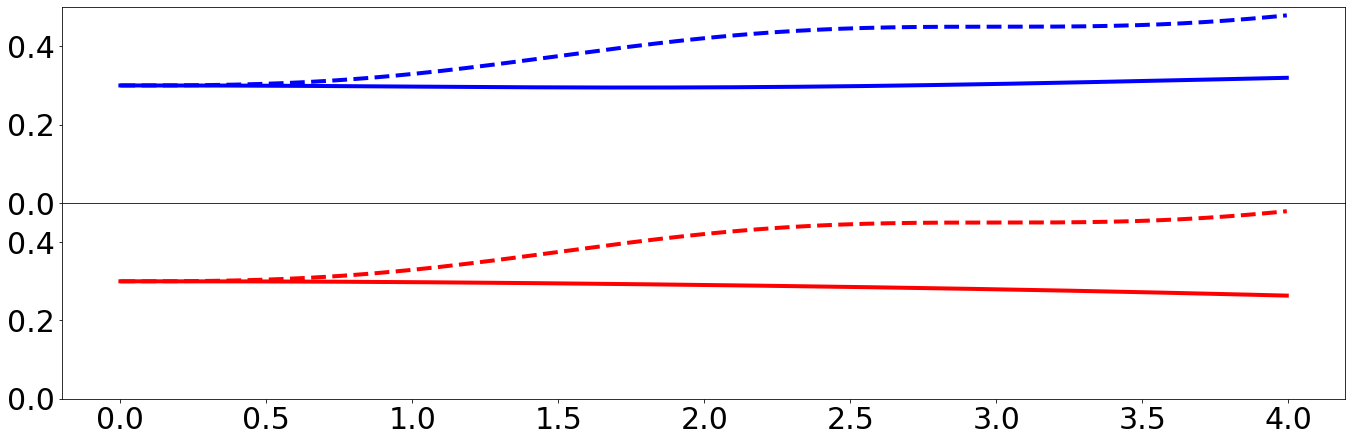

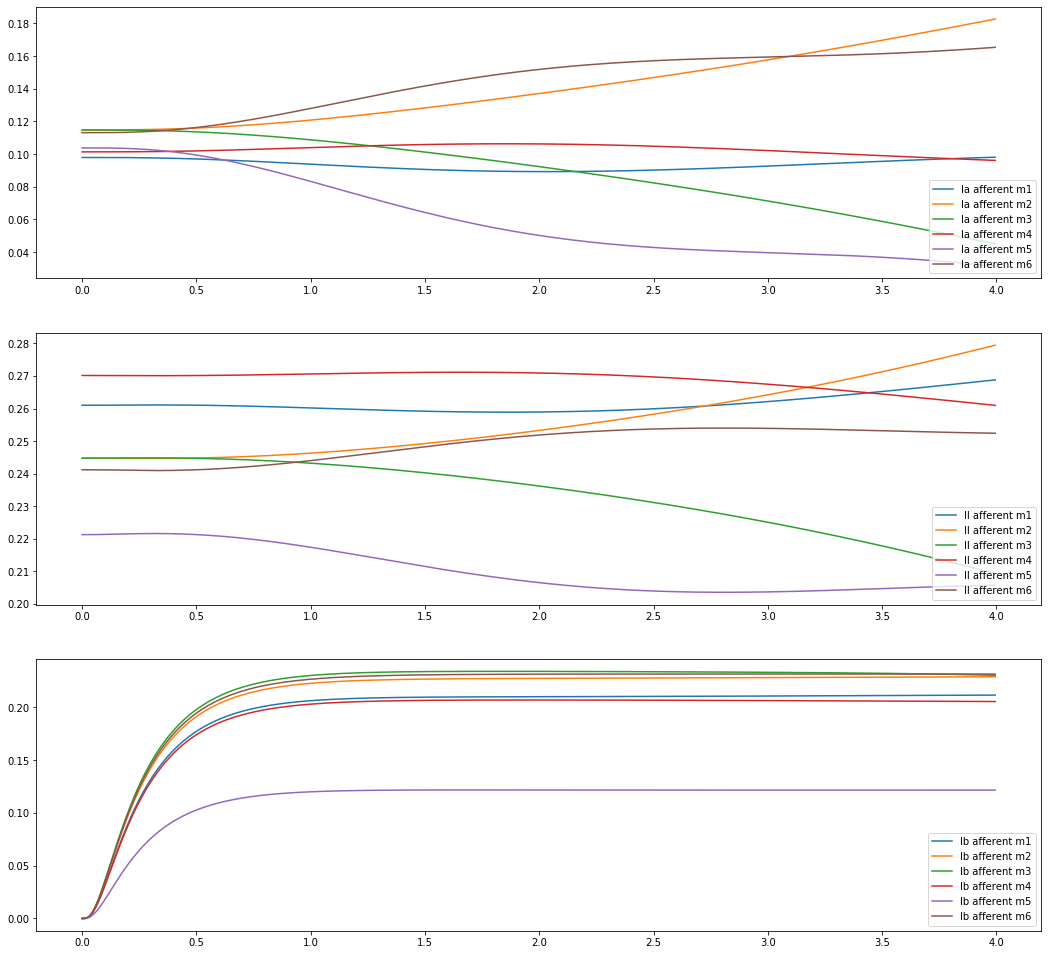

[[3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8911107926678595, -0.8291302846827832, -0.9541391891053229, -0.9563744923051403, -0.9261260537170147, -1.0995948130344706, -1.1622398916770107], [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, -0.8372512060543804, 1.1153

Initial state. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:0, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103

uid:0, sid:11, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:12, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472,

uid:0, sid:23, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:24, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472,

uid:0, sid:35, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:36, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472,

uid:0, sid:47, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.1587189289562907]
Initial state. unit 1 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8911107926678595, -0.8291302846827832, -0.9541391891053229, -0.9563744923051403, -0.9261260537170147, -1.0995948130344706, -1.1622398916770107]
uid:1, sid:0, e1:23.230492, e2:23.230492, e3:23.230492
change. u

uid:2, sid:11, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 2 test syns: : [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, -0.8372512060543804, 1.115349330181512, -0.8926376634678552, -0.9606014067890095, -1.0037987958821297]
uid:2, sid:12, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 2 test syns: : [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, -0.8372512060543804, 1.115349330181512, -0.8926376634678552, -0.9606014067890095, -1.0037987958821297]
uid:2, sid:13, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 2 test syns: : [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360623, -0.8372512060543804, 1.115349330181512, -0.8926376634678552, -0.9606014067890095, -1.0

uid:5, sid:0, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018

uid:5, sid:8, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018

uid:5, sid:16, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:5, sid:24, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:5, sid:32, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:5, sid:40, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:5, sid:48, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.13814126740529642, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090

uid:5, sid:56, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.0865310790876459, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090

uid:5, sid:64, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:6, sid:12, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 6 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -1.0322685639185025]
uid:6, sid:13, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 6 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -1.0322685639185025]
uid:6, sid:14, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 6 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335066, -1.1631240253647102, -1.0322685639185025]
uid:6, sid:15, e1:23.230492, e2:23.230492, e3:23.230492
change. 

uid:7, sid:16, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 7 test syns: : [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0047829728710416, -1.1828675575324912, 1.1225184615239185, -1.1031205340348236, 1.1392844387905734, -0.92176405673792, 0.944530745880461, -0.9977194241815663, 0.917668968965553, 1.0640338279798918, -0.9863458593583608, 0.8779264242739213, -1.1472959614818588]
uid:7, sid:17, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 7 test syns: : [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0047829728710416, -1.1828675575324912, 1.1225184615239185, -1.1031205340348236, 1.1392844387905734, -0.92176405673792, 0.944530745880461, -0.9977194241815663, 0.917668968965553, 1.0640338279798918, -0.9863458593583608, 0.8779264242739213, -1.1472959614818588]
uid:7, sid:18, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 7 test syns: : [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0047829728710416, 

uid:8, sid:14, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 8 test syns: : [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.8272427265478529]
uid:8, sid:15, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 8 test syns: : [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.1810271952951994, 0.8272427265478529]
uid:8, sid:16, e1:23.230492, e2:23.230492, e3:23.230492
change. unit 8 test syns: : [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.8272427265478529]
Initial state. unit 9 test syns: : [1.0, 1.0, 1.0, -0.12017333302

uid:10, sid:2, e1:22.671007, e2:22.669298, e3:22.672727
change. unit 10 test syns: : [0.0, -1.0, 2.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -1.1083950926558988, -0.9482918713325923, -0.0844691158719415, -0.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.00843101141

uid:10, sid:10, e1:22.496370, e2:29.948781, e3:22.496370
change. unit 10 test syns: : [0.0, -1.0, 2.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -1.1083950926558988, -0.9482918713325923, -0.0844691158719415, -0.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:18, e1:22.496370, e2:22.504351, e3:22.496370
change. unit 10 test syns: : [0.0, -1.0, 2.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -1.1083950926558988, -0.9482918713325923, -0.0844691158719415, -0.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:26, e1:22.496370, e2:22.517103, e3:22.496370
change. unit 10 test syns: : [0.0, -1.0, 2.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -1.1083950926558988, -0.9482918713325923, -0.0844691158719415, -0.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:34, e1:22.496370, e2:23.227346, e3:33.700009
change. unit 10 test syns: : [0.0, -1.0, 2.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -1.1083950926558988, -0.9482918713325923, -0.0844691158719415, -0.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:42, e1:22.496370, e2:23.227346, e3:33.700009
change. unit 10 test syns: : [0.0, -1.0, 2.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874287, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:50, e1:22.496370, e2:23.227346, e3:33.700009
change. unit 10 test syns: : [0.0, -1.0, 2.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469278, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:58, e1:22.496370, e2:22.496370, e3:22.496370
change. unit 10 test syns: : [0.0, -1.0, 2.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:66, e1:22.496370, e2:22.496370, e3:22.496370
change. unit 10 test syns: : [0.0, -1.0, 2.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:12, sid:0, e1:22.484301, e2:22.484301, e3:22.484301
change. unit 12 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, -3.0, -0.845108752369458, -1.1546036144462242, 0.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -1.0295028538314182, 0.8139120089211453, -0.9664540803316589, 0.049172787967753484]
uid:12, sid:1, e1:22.484301, e2:22.484301, e3:22.484301
change. unit 12 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, -3.0, -0.845108752369458, -1.1546036144462242, 0.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -1.0295028538314182, 0.8139120089211453, -0.9664540803316589, 0.049172787967753484]
uid:12, sid:2, e1:22.484301, e2:22.484301, e3:22.484301
change. unit 12 test syns: : [-3.0, -3.0, 2.0, 3.0, -3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, -3.0, -0.84

uid:12, sid:20, e1:22.483998, e2:22.483998, e3:22.483998
change. unit 12 test syns: : [-3.0, -3.0, 2.0, 2.0, -3.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, -3.0, -0.845108752369458, -1.1546036144462242, -0.16422880575419518, -0.1699174660685504, -0.9645319472530756, 0.1627842153710266, -1.0671218383881333, 0.08297567258088234, -0.9327493561324718, -1.0295028538314182, 0.8139120089211453, -0.9664540803316589, 0.049172787967753484]
uid:12, sid:21, e1:22.483998, e2:22.483998, e3:22.483998
change. unit 12 test syns: : [-3.0, -3.0, 2.0, 2.0, -3.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, -3.0, -0.845108752369458, -1.1546036144462242, -0.16422880575419518, -0.1699174660685504, -0.9645319472530756, 0.1627842153710266, -1.0671218383881333, 0.08297567258088234, -0.9327493561324719, -1.029502853831418, 0.8139120089211453, -0.9664540803316589, 0.049172787967753484]
uid:12, sid:22, e1:22.483998, e2:22.484283, e3:22.482774
change. unit 12 test syns: : [-3.0, -3.0, 2.0, 2.0, -3.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, -

uid:14, sid:2, e1:22.481240, e2:22.481240, e3:22.481240
change. unit 14 test syns: : [0.0, 0.0, 0.0, -0.07757993049566014, 1.0, 0.2696761449625127, -0.9932816412269792, -1.0790058904073057, -1.0849765857087106, 1.1172163576388046, -1.1814014890295628, -1.013791039036363, -1.1800404062509589]
uid:14, sid:3, e1:22.481240, e2:22.481694, e3:22.481247
change. unit 14 test syns: : [0.0, 0.0, 0.0, -0.07757993049566014, 1.0, 0.2696761449625127, -0.9932816412269792, -1.0790058904073057, -1.0849765857087106, 1.1172163576388046, -1.1814014890295628, -1.013791039036363, -1.1800404062509589]
uid:14, sid:4, e1:22.481240, e2:22.481240, e3:22.481240
change. unit 14 test syns: : [0.0, 0.0, 0.0, -0.07757993049566014, 0.0, 0.2696761449625127, -0.9932816412269792, -1.0790058904073057, -1.0849765857087106, 1.1172163576388046, -1.1814014890295628, -1.013791039036363, -1.1800404062509589]
uid:14, sid:5, e1:22.481240, e2:22.481240, e3:22.481671
change. unit 14 test syns: : [0.0, 0.0, 0.0, -0.07757993049566014

uid:15, sid:6, e1:22.480296, e2:22.480296, e3:22.480296
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:7, e1:22.480296, e2:22.480296, e3:22.480296
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.

uid:15, sid:18, e1:22.480296, e2:22.480296, e3:22.480296
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:19, e1:22.480296, e2:22.480296, e3:22.480296
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 

uid:15, sid:30, e1:22.480296, e2:22.480296, e3:22.480296
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:31, e1:22.480296, e2:22.480296, e3:22.480296
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 

uid:15, sid:42, e1:22.480296, e2:22.480296, e3:22.480296
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:43, e1:22.480296, e2:22.480296, e3:22.480296
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 

uid:17, sid:0, e1:22.475184, e2:22.475184, e3:22.475184
change. unit 17 test syns: : [-3.0, -3.0, 3.0, -3.0, 3.0, 3.0, -3.0, 3.0, 3.0, -0.9983407800106362, -0.8575195947445687, -0.06750768778052971, -1.109371920739637, -0.06363472818475055, -0.07895202201506338, -0.8112526668735782, -0.19787000027555113, -0.09627009060385722, -0.026403491636533438]
uid:17, sid:1, e1:22.475184, e2:22.475184, e3:22.475184
change. unit 17 test syns: : [-3.0, -4.0, 3.0, -3.0, 3.0, 3.0, -3.0, 3.0, 3.0, -0.9983407800106362, -0.8575195947445687, -0.06750768778052971, -1.109371920739637, -0.06363472818475055, -0.07895202201506338, -0.8112526668735782, -0.19787000027555113, -0.09627009060385722, -0.026403491636533438]
uid:17, sid:2, e1:22.475184, e2:22.475523, e3:22.474965
change. unit 17 test syns: : [-3.0, -4.0, 2.0, -3.0, 3.0, 3.0, -3.0, 3.0, 3.0, -0.9983407800106362, -0.8575195947445687, -0.06750768778052971, -1.109371920739637, -0.06363472818475055, -0.07895202201506338, -0.8112526668735782, -0.19787000027

uid:18, sid:6, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.9167197665136751]
uid:18, sid:7, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.9167197665136751]
uid:18, sid:8, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.9167197665136751]
uid:18, sid:9, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.0024841074603887403, -0.01584

uid:20, sid:4, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.12657

uid:20, sid:12, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:20, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:28, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:36, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:44, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:52, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:60, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.1581501852682634, 0.8385901947808441, 0.04738415529429055, -0.12657

uid:21, sid:0, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 21 test syns: : [3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 1.0798623568794796]
uid:21, sid:1, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 21 test syns: : [3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 1.0798623568794796]
uid:21, sid:2, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 21 test syns: : [3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 1.0798623568794796]
uid:21, sid:3, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 21 test syns: : [3.0, 

uid:22, sid:7, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 22 test syns: : [-1.0, 3.0, -1.0, 1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -0.9015012693932637, 0.9985684136956658, -0.923588366567365, 1.088693878806725, -1.13068629232945, 0.8754089366478497, -1.0723387390364125, -0.9425641866041556, 0.9408058213425513, -0.9941070018731826, -0.9409786655106341, 1.0277798099622828, 1.035721398218348]
uid:22, sid:8, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 22 test syns: : [-1.0, 3.0, -1.0, 1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -0.9015012693932637, 0.9985684136956658, -0.923588366567365, 1.088693878806725, -1.13068629232945, 0.8754089366478497, -1.0723387390364125, -0.9425641866041556, 0.9408058213425513, -0.9941070018731826, -0.9409786655106341, 1.0277798099622828, 1.035721398218348]
uid:22, sid:9, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 22 test syns: : [-1.0, 3.0, -1.0, 1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -0.90150126939326

uid:23, sid:2, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 23 test syns: : [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.9701366744912456, 1.1525343826894248, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, -0.8061290858869787]
uid:23, sid:3, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 23 test syns: : [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.9701366744912456, 1.1525343826894248, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, -0.8061290858869787]
uid:23, sid:4, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 23 test syns: : [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.9701366744912456, 1.1525343826894248, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, -0.8061290858869787]
uid:23, sid:5, e1:22.474698, e2:22.474698, e3:22.

uid:24, sid:11, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 24 test syns: : [0.0, 0.0, -0.08885866870169501, 0.0, -0.1138210937867643, 0.0, -0.03300671281796963, 0.11816157437302743, -1.8681693233382821, -0.013810300505924022, -2.077720780961985, 0.1904687263805107, -1.0910662729113776]
uid:24, sid:12, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 24 test syns: : [0.0, 0.0, -0.08885866870169501, 0.0, -0.1138210937867643, 0.0, -0.03300671281796963, 0.11816157437302743, -1.8681693233382821, -0.013810300505924022, -2.077720780961985, 0.1904687263805107, -0.09106627291137759]
Initial state. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046

uid:25, sid:6, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461,

uid:25, sid:14, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:22, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:30, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:38, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:46, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:54, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.1110725117953244, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461,

uid:25, sid:62, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333406

uid:26, sid:5, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 26 test syns: : [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1737301039723131, -0.9048983929014287, -0.8926551351669579, -0.8591915757236039, -1.0962309103195707, -1.0621288350476732, -1.1029448933394213, -0.9280454194581185, -0.8125499067347384]
uid:26, sid:6, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 26 test syns: : [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1737301039723131, -0.9048983929014287, -0.8926551351669579, -0.8591915757236039, -1.0962309103195707, -1.0621288350476732, -1.1029448933394213, -0.9280454194581185, -0.8125499067347384]
uid:26, sid:7, e1:22.474698, e2:22.474698, e3:22.474698
change. unit 26 test syns: : [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1737301039723131, -0.9048983929014287, -0.8926551351669579, -0.8591915757236039, -1.0962309103195707, -1.0621288350476732, -1.1029448933394213, -0.9280454194581185, -0.8125499067347384]
uid:26, sid:8, e1:22.474698, e2:22.474698, e3:22.474698

uid:27, sid:10, e1:22.474508, e2:22.474508, e3:22.474508
change. unit 27 test syns: : [-1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 1.0442560854270846, 0.8414636623546127, -0.9661408416068481, -0.8051148592223745, 1.166254474436637, -1.1481022976848418, 0.8345472733379895, 0.9271177977626888, -1.1952109005534342, 1.0248987521150206, 1.139846445668739, -1.1080186673489523, -0.9198001029069299]
uid:27, sid:11, e1:22.474508, e2:22.474508, e3:22.474508
change. unit 27 test syns: : [-1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.0, -1.0, -1.0, 0.0, 1.0442560854270846, 0.8414636623546127, -0.9661408416068481, -0.8051148592223745, 1.166254474436637, -1.1481022976848418, 0.8345472733379895, 0.9271177977626888, -1.1952109005534342, 1.0248987521150206, 1.139846445668739, -1.1080186673489523, -0.9198001029069299]
uid:27, sid:12, e1:22.474508, e2:22.474508, e3:22.474508
change. unit 27 test syns: : [-1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.0, -1.0, -1.0, 0.0, 2.04425608

uid:28, sid:6, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 28 test syns: : [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.9003445763549601, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:7, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 28 test syns: : [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.9003445763549601, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:8, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 28 test syns: : [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.09965542364503988, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:9, e1:22.474486, e2:22.474486, e3:22.474486


Iteration: 2
Error: 22.47448568205143
Execution time: 98490.93285870552 seconds


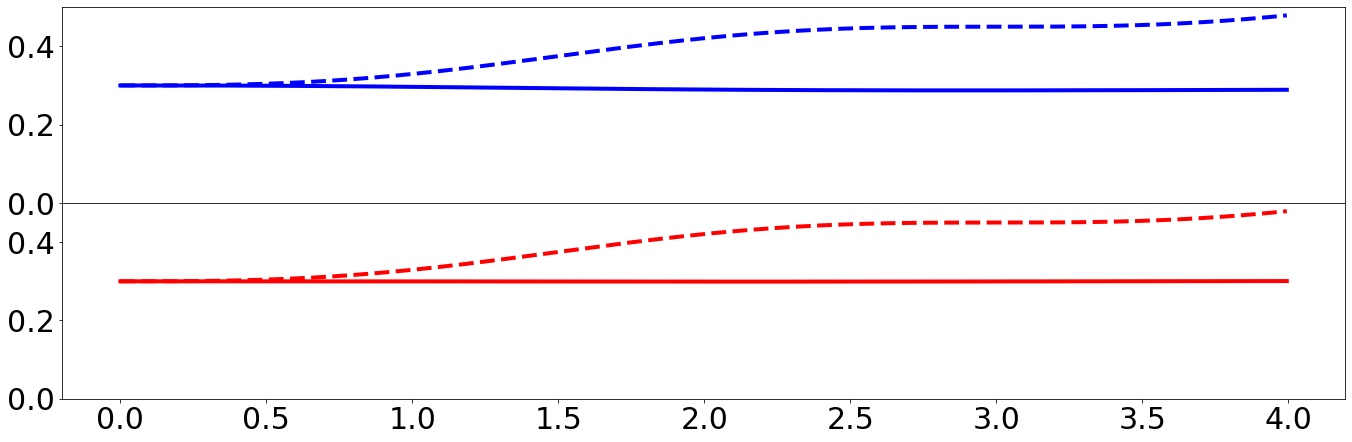

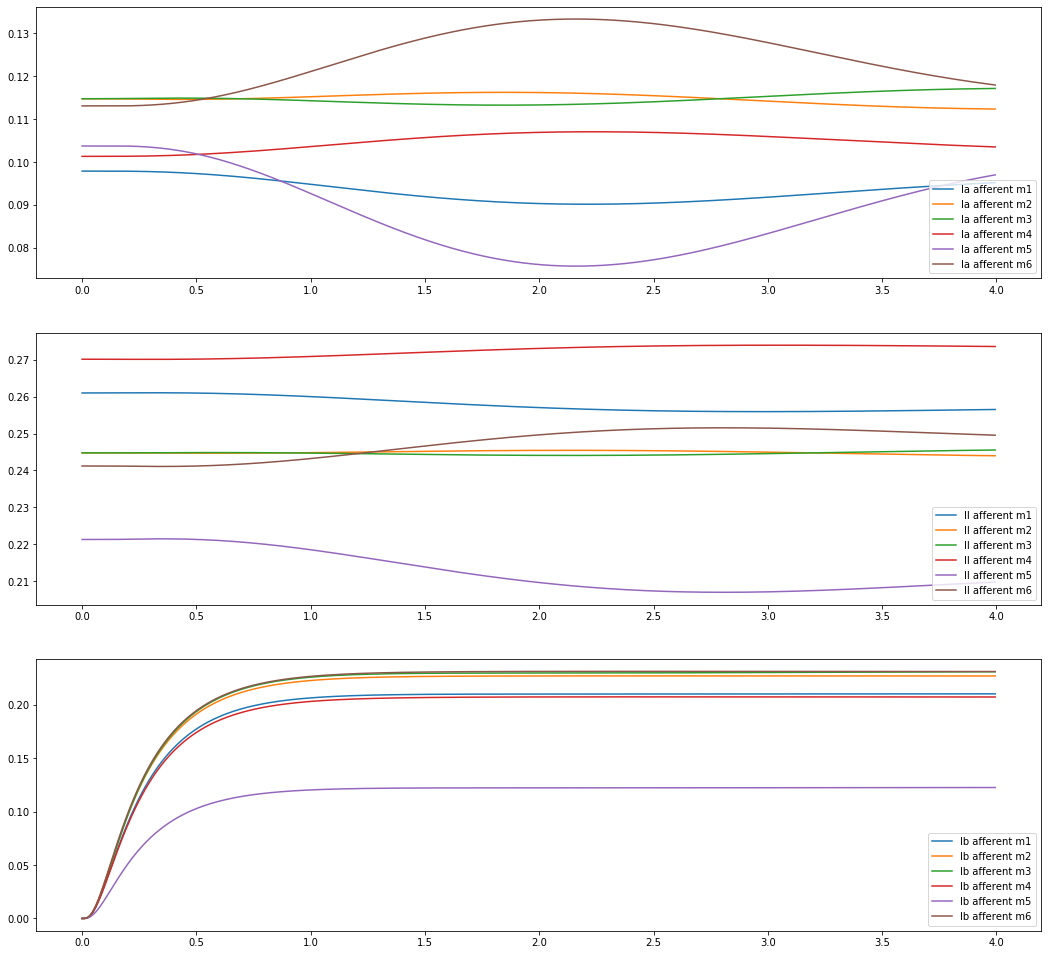

[[3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8911107926678595, -0.8291302846827832, -0.9541391891053229, -0.9563744923051403, -0.9261260537170147, -1.0995948130344706, -2.162239891677011], [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, -0.8372512060543804, 1.11534

Initial state. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:0, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103

uid:0, sid:11, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:12, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472,

uid:0, sid:23, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:24, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472,

uid:0, sid:35, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.5444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:36, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.5444251884085287, -0.8374785419747472,

uid:0, sid:47, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.5444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
Initial state. unit 1 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8911107926678595, -0.8291302846827832, -0.9541391891053229, -0.9563744923051403, -0.9261260537170147, -1.0995948130344706, -2.162239891677011]
uid:1, sid:0, e1:22.474486, e2:22.474486, e3:22.474486
change. u

uid:2, sid:11, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 2 test syns: : [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, -0.8372512060543804, 1.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.0037987958821297]
uid:2, sid:12, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 2 test syns: : [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, -0.8372512060543804, 1.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.0037987958821297]
uid:2, sid:13, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 2 test syns: : [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, -0.8372512060543804, 1.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.0

uid:5, sid:0, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018

uid:5, sid:8, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018

uid:5, sid:16, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:5, sid:24, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:5, sid:32, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:5, sid:40, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:5, sid:48, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.13814126740529642, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090

uid:5, sid:56, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.08653107908764601, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409

uid:5, sid:64, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:6, sid:12, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 6 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -2.0322685639185023]
uid:6, sid:13, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 6 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -2.0322685639185023]
uid:6, sid:14, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 6 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -2.0322685639185023]
uid:6, sid:15, e1:22.474486, e2:22.474486, e3:22.474486
change. 

uid:7, sid:16, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 7 test syns: : [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0047829728710416, -1.1828675575324912, 1.1225184615239185, -1.1031205340348236, 1.1392844387905734, -0.92176405673792, 0.944530745880461, -0.9977194241815663, 0.917668968965553, 1.0640338279798918, -0.9863458593583608, 0.8779264242739213, -2.1472959614818588]
uid:7, sid:17, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 7 test syns: : [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0047829728710416, -1.1828675575324912, 1.1225184615239185, -1.1031205340348236, 1.1392844387905734, -0.92176405673792, 0.944530745880461, -0.9977194241815663, 0.917668968965553, 1.0640338279798918, -0.9863458593583608, 0.8779264242739213, -2.1472959614818588]
uid:7, sid:18, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 7 test syns: : [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0047829728710416, 

uid:8, sid:14, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 8 test syns: : [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.8272427265478529]
uid:8, sid:15, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 8 test syns: : [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.8272427265478529]
uid:8, sid:16, e1:22.474486, e2:22.474486, e3:22.474486
change. unit 8 test syns: : [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.8272427265478529]
Initial state. unit 9 test syns: : [0.0, 0.0, 0.0, -0.1201733330

uid:10, sid:2, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 10 test syns: : [0.5, -1.0, 2.5, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.00843101141

uid:10, sid:10, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 10 test syns: : [0.5, -1.0, 2.5, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:18, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 10 test syns: : [0.5, -1.0, 2.5, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:26, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 10 test syns: : [0.5, -1.0, 2.5, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:34, e1:22.474484, e2:22.950342, e3:24.867921
change. unit 10 test syns: : [0.5, -1.0, 2.5, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 1.3915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:42, e1:22.474484, e2:22.950342, e3:24.867921
change. unit 10 test syns: : [0.5, -1.0, 2.5, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 1.3915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874276, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:50, e1:22.474484, e2:22.950342, e3:24.867921
change. unit 10 test syns: : [0.5, -1.0, 2.5, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 1.3915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469278, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:58, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 10 test syns: : [0.5, -1.0, 2.5, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 1.3915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:66, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 10 test syns: : [0.5, -1.0, 2.5, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 1.3915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:12, sid:1, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 12 test syns: : [-3.0, -3.0, 2.0, 2.0, -3.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, -3.0, -0.845108752369458, -1.1546036144462242, -0.16422880575419518, -0.1699174660685504, -0.9645319472530756, 0.1627842153710266, -1.0671218383881333, 0.08297567258088234, -0.9327493561324719, -1.0295028538314182, -0.18608799107885465, -0.9664540803316589, -0.9508272120322465]
uid:12, sid:2, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 12 test syns: : [-3.0, -3.0, 1.5, 2.0, -3.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, -3.0, -0.845108752369458, -1.1546036144462242, -0.16422880575419518, -0.1699174660685504, -0.9645319472530756, 0.1627842153710266, -1.0671218383881333, 0.08297567258088234, -0.9327493561324719, -1.0295028538314182, -0.18608799107885465, -0.9664540803316589, -0.9508272120322465]
uid:12, sid:3, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 12 test syns: : [-3.0, -3.0, 1.5, 1.5, -3.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, -

uid:12, sid:21, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 12 test syns: : [-3.0, -3.0, 1.5, 1.5, -3.0, 1.5, -3.0, 1.5, -3.0, -3.0, 1.5, -3.0, -0.845108752369458, -1.1546036144462242, -0.6642288057541952, -0.6699174660685504, -0.9645319472530756, 0.1627842153710266, -1.0671218383881333, 0.08297567258088234, -0.9327493561324719, -1.0295028538314182, -0.18608799107885465, -0.9664540803316589, -0.9508272120322465]
uid:12, sid:22, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 12 test syns: : [-3.0, -3.0, 1.5, 1.5, -3.0, 1.5, -3.0, 1.5, -3.0, -3.0, 1.5, -3.0, -0.845108752369458, -1.1546036144462242, -0.6642288057541952, -0.6699174660685504, -0.9645319472530756, 0.1627842153710266, -1.0671218383881333, 0.08297567258088234, -0.9327493561324719, -1.0295028538314182, -0.18608799107885465, -0.9664540803316589, -0.9508272120322465]
uid:12, sid:23, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 12 test syns: : [-3.0, -3.0, 1.5, 1.5, -3.0, 1.5, -3.0, 1.5, -3.0, -3.0, 1.5, 

uid:14, sid:3, e1:22.474484, e2:22.474485, e3:22.474484
change. unit 14 test syns: : [0.0, 0.0, 0.0, -0.07757993049566014, 0.0, 0.2696761449625127, -1.9932816412269792, -2.0790058904073057, -2.0849765857087106, 2.117216357638805, -2.1814014890295628, -2.013791039036363, -2.180040406250959]
uid:14, sid:4, e1:22.474484, e2:22.474484, e3:22.474490
change. unit 14 test syns: : [0.0, 0.0, 0.0, -0.07757993049566014, 0.0, 0.2696761449625127, -1.9932816412269792, -2.0790058904073057, -2.0849765857087106, 2.117216357638805, -2.1814014890295628, -2.013791039036363, -2.180040406250959]
uid:14, sid:5, e1:22.474484, e2:22.474484, e3:22.474485
change. unit 14 test syns: : [0.0, 0.0, 0.0, -0.07757993049566014, 0.0, 0.2696761449625127, -1.9932816412269792, -2.0790058904073057, -2.0849765857087106, 2.117216357638805, -2.1814014890295628, -2.013791039036363, -2.180040406250959]
uid:14, sid:6, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 14 test syns: : [0.0, 0.0, 0.0, -0.07757993049566014, 0.0,

uid:15, sid:7, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:8, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.

uid:15, sid:19, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:20, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 

uid:15, sid:31, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:32, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 

uid:15, sid:43, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.02050735846388485, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:44, e1:22.474484, e2:22.474484, e3:22.474484
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0

uid:17, sid:2, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 17 test syns: : [-3.0, -4.0, 1.5, -4.0, 2.0, 2.0, -4.0, 2.0, 2.0, -1.9983407800106363, -1.8575195947445686, -1.0675076877805296, -2.109371920739637, -1.0636347281847505, -1.0789520220150635, -1.8112526668735782, -1.1978700002755511, -1.0962700906038572, -0.026403491636533438]
uid:17, sid:3, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 17 test syns: : [-3.0, -4.0, 1.5, -3.5, 2.0, 2.0, -4.0, 2.0, 2.0, -1.9983407800106363, -1.8575195947445686, -1.0675076877805296, -2.109371920739637, -1.0636347281847505, -1.0789520220150635, -1.8112526668735782, -1.1978700002755511, -1.0962700906038572, -0.026403491636533438]
uid:17, sid:4, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 17 test syns: : [-3.0, -4.0, 1.5, -3.5, 1.5, 2.0, -4.0, 2.0, 2.0, -1.9983407800106363, -1.8575195947445686, -1.0675076877805296, -2.109371920739637, -1.0636347281847505, -1.0789520220150635, -1.8112526668735782, -1.1978700002755511, -1.096

uid:18, sid:8, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.9167197665136751]
uid:18, sid:9, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.9167197665136751]
uid:18, sid:10, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.0024841074603887403, -0.015845928566742273, 0.02792523875393743, 0.9167197665136751]
uid:18, sid:11, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.0024841074603887403, -0.015

uid:20, sid:5, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.12657

uid:20, sid:13, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:21, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:29, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:37, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:45, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:53, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:61, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:21, sid:1, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 21 test syns: : [3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 1.0798623568794796]
uid:21, sid:2, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 21 test syns: : [3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 1.0798623568794796]
uid:21, sid:3, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 21 test syns: : [3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 1.0798623568794796]
uid:21, sid:4, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 21 test syns: : [3.0, 

uid:22, sid:8, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 22 test syns: : [-1.0, 3.0, -1.0, 1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -0.9015012693932637, 0.9985684136956658, -0.923588366567365, 1.088693878806725, -1.13068629232945, 0.8754089366478497, -1.0723387390364125, -0.9425641866041556, 0.9408058213425513, -0.9941070018731826, -0.9409786655106341, 1.0277798099622828, 2.0357213982183477]
uid:22, sid:9, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 22 test syns: : [-1.0, 3.0, -1.0, 1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -0.9015012693932637, 0.9985684136956658, -0.923588366567365, 1.088693878806725, -1.13068629232945, 0.8754089366478497, -1.0723387390364125, -0.9425641866041556, 0.9408058213425513, -0.9941070018731826, -0.9409786655106341, 1.0277798099622828, 2.0357213982183477]
uid:22, sid:10, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 22 test syns: : [-1.0, 3.0, -1.0, 1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -0.90150126939

uid:23, sid:3, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 23 test syns: : [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.9701366744912456, 1.1525343826894248, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, -0.8061290858869787]
uid:23, sid:4, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 23 test syns: : [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.9701366744912456, 1.1525343826894248, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, -0.8061290858869787]
uid:23, sid:5, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 23 test syns: : [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.9701366744912456, 1.1525343826894248, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, -0.8061290858869787]
uid:23, sid:6, e1:22.474414, e2:22.474414, e3:22.

uid:24, sid:12, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 24 test syns: : [-0.5, 0.0, -0.08885866870169501, -0.5, -0.6138210937867643, 0.0, -0.5330067128179696, 0.6181615743730274, -2.3681693233382823, -0.513810300505924, -2.577720780961985, 0.6904687263805107, 0.4089337270886224]
Initial state. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.1825538599

uid:25, sid:7, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461,

uid:25, sid:15, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:23, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:31, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:39, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:47, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:55, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:63, e1:22.474414, e2:22.474414, e3:22.474414
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:26, sid:8, e1:22.474388, e2:22.474388, e3:22.474388
change. unit 26 test syns: : [0.5, -0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, -1.6737301039723131, -0.9048983929014287, -0.8926551351669579, -0.8591915757236039, -1.0962309103195707, -1.0621288350476732, -1.1029448933394213, -0.9280454194581185, 0.18745009326526163]
uid:26, sid:9, e1:22.474388, e2:22.474405, e3:22.474384
change. unit 26 test syns: : [0.5, -0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, -1.6737301039723131, -1.4048983929014287, -0.8926551351669579, -0.8591915757236039, -1.0962309103195707, -1.0621288350476732, -1.1029448933394213, -0.9280454194581185, 0.18745009326526163]
uid:26, sid:10, e1:22.474384, e2:22.474384, e3:22.474384
change. unit 26 test syns: : [0.5, -0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, -1.6737301039723131, -1.4048983929014287, -1.392655135166958, -0.8591915757236039, -1.0962309103195707, -1.0621288350476732, -1.1029448933394213, -0.9280454194581185, 0.18745009326526163]
uid:26, sid:11, e1:22.474384, e2:22.474384, e3:22.47

uid:27, sid:13, e1:22.474384, e2:22.474384, e3:22.474384
change. unit 27 test syns: : [-0.5, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.0, -1.0, -1.0, 0.0, 2.044256085427085, 1.8414636623546126, -1.966140841606848, -1.8051148592223745, 1.166254474436637, -1.1481022976848418, 0.8345472733379895, 0.9271177977626888, -1.1952109005534342, 1.0248987521150206, 1.139846445668739, -1.1080186673489523, -1.91980010290693]
uid:27, sid:14, e1:22.474384, e2:22.474384, e3:22.474384
change. unit 27 test syns: : [-0.5, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.0, -1.0, -1.0, 0.0, 2.044256085427085, 1.8414636623546126, -1.466140841606848, -1.8051148592223745, 1.166254474436637, -1.1481022976848418, 0.8345472733379895, 0.9271177977626888, -1.1952109005534342, 1.0248987521150206, 1.139846445668739, -1.1080186673489523, -1.91980010290693]
uid:27, sid:15, e1:22.474384, e2:22.474384, e3:22.474384
change. unit 27 test syns: : [-0.5, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.0, -1.0, -1.0, 0.0, 2.044256085427085,

uid:28, sid:10, e1:22.474365, e2:22.474365, e3:22.474365
change. unit 28 test syns: : [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.4003445763549601, -0.8563958587092644, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:11, e1:22.474365, e2:22.474365, e3:22.474365
change. unit 28 test syns: : [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.4003445763549601, -0.8563958587092644, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:12, e1:22.474365, e2:22.474365, e3:22.474365
change. unit 28 test syns: : [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.4003445763549601, -0.8563958587092644, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:13, e1:22.474365, e2:22.474365, e3:22.47436

Iteration: 3
Error: 22.474344643544537
Execution time: 147856.13948702812 seconds


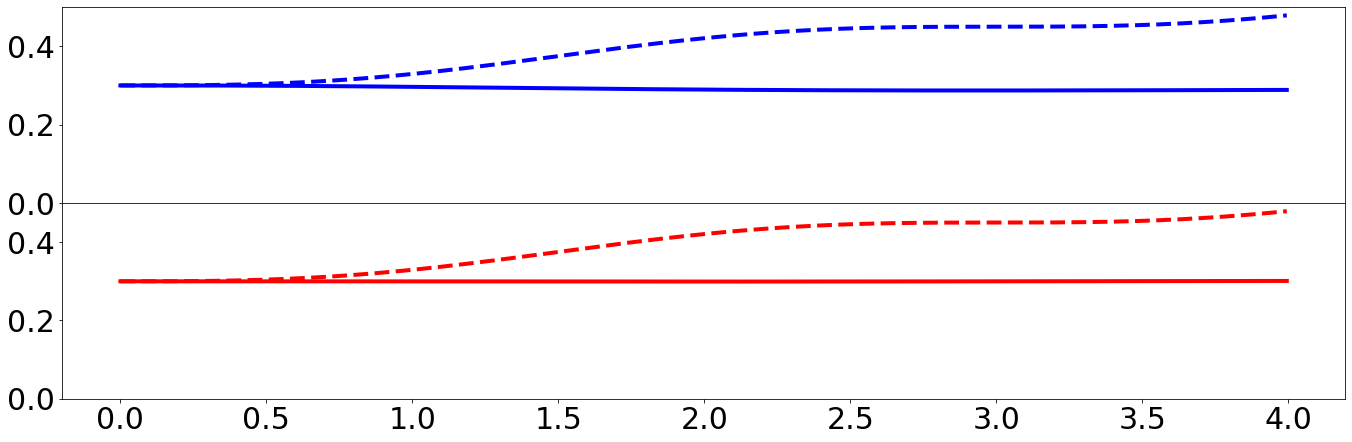

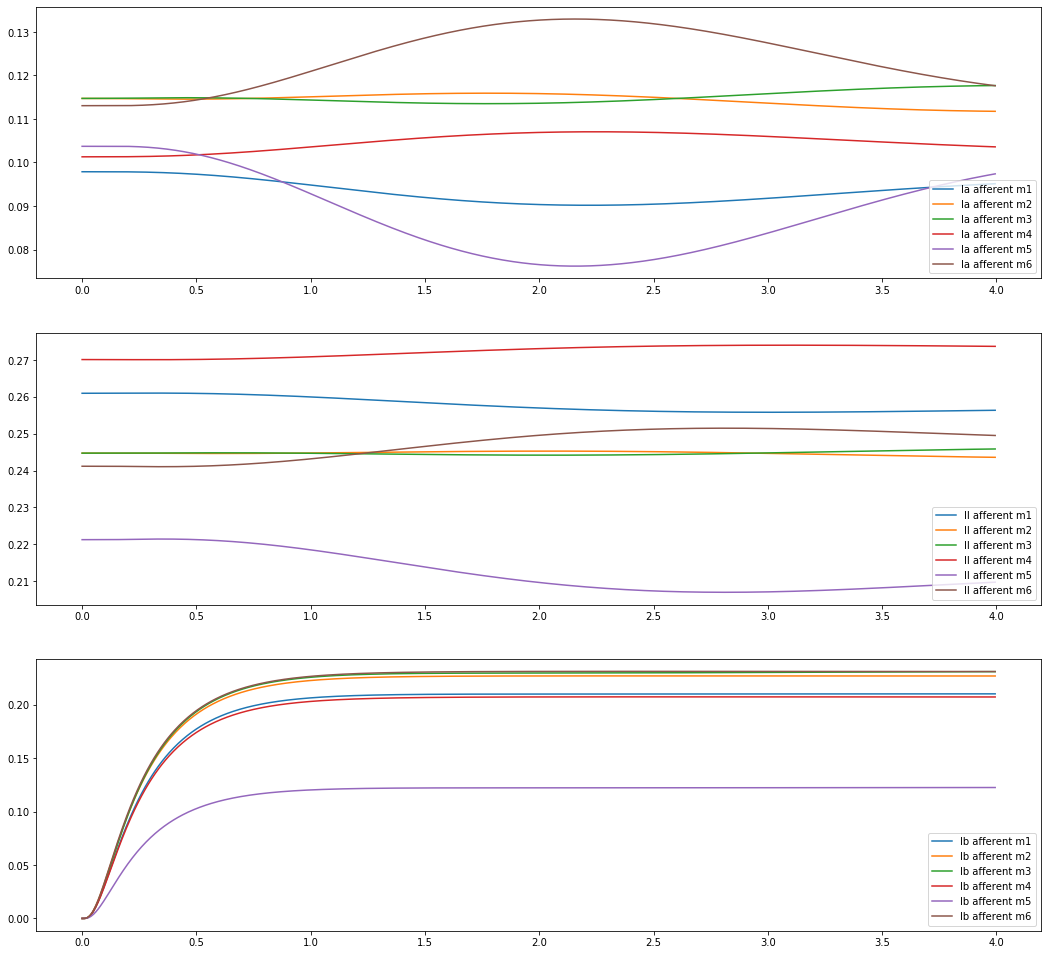

[[3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.5444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8911107926678595, -0.8291302846827832, -0.9541391891053229, -0.9563744923051403, -0.9261260537170147, -1.0995948130344706, -2.162239891677011], [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, -0.8372512060543804, 1.11534

Initial state. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.5444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:0, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.5444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103

uid:0, sid:11, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.5444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:12, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.5444251884085287, -0.8374785419747472,

uid:0, sid:23, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.5444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:24, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.5444251884085287, -0.8374785419747472,

uid:0, sid:35, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.044425188408528715, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:36, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.044425188408528715, -0.8374785419747

uid:0, sid:47, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 0 test syns: : [3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.044425188408528715, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
Initial state. unit 1 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8911107926678595, -0.8291302846827832, -0.9541391891053229, -0.9563744923051403, -0.9261260537170147, -1.0995948130344706, -2.162239891677011]
uid:1, sid:0, e1:22.474345, e2:22.474345, e3:22.474345
change.

uid:2, sid:11, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 2 test syns: : [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, -0.8372512060543804, 1.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.0037987958821297]
uid:2, sid:12, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 2 test syns: : [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, -0.8372512060543804, 1.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.0037987958821297]
uid:2, sid:13, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 2 test syns: : [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, -0.8372512060543804, 1.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.0

uid:5, sid:0, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018

uid:5, sid:8, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018

uid:5, sid:16, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:5, sid:24, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:5, sid:32, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:5, sid:40, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:5, sid:48, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.13814126740529642, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.194090

uid:5, sid:56, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.08653107908764601, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409

uid:5, sid:64, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 5 test syns: : [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1940901

uid:6, sid:12, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 6 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -2.0322685639185023]
uid:6, sid:13, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 6 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -2.0322685639185023]
uid:6, sid:14, e1:22.474345, e2:22.474345, e3:22.474345
change. unit 6 test syns: : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -2.0322685639185023]
uid:6, sid:15, e1:22.474345, e2:22.474345, e3:22.474345
change. 

uid:7, sid:16, e1:22.474339, e2:22.474339, e3:22.474339
change. unit 7 test syns: : [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0047829728710416, -1.1828675575324912, 1.1225184615239185, -1.1031205340348236, 1.1392844387905734, -0.92176405673792, 0.944530745880461, -0.9977194241815663, 0.917668968965553, 1.0640338279798918, -0.9863458593583608, 0.8779264242739213, -2.1472959614818588]
uid:7, sid:17, e1:22.474339, e2:22.474339, e3:22.474339
change. unit 7 test syns: : [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0047829728710416, -1.1828675575324912, 1.1225184615239185, -1.1031205340348236, 1.1392844387905734, -0.92176405673792, 0.944530745880461, -0.9977194241815663, 0.917668968965553, 1.0640338279798918, -0.9863458593583608, 0.8779264242739213, -2.1472959614818588]
uid:7, sid:18, e1:22.474339, e2:22.474339, e3:22.474339
change. unit 7 test syns: : [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0047829728710416, 

uid:8, sid:14, e1:22.474339, e2:22.474339, e3:22.474339
change. unit 8 test syns: : [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.8272427265478529]
uid:8, sid:15, e1:22.474339, e2:22.474339, e3:22.474339
change. unit 8 test syns: : [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.8272427265478529]
uid:8, sid:16, e1:22.474339, e2:22.474339, e3:22.474339
change. unit 8 test syns: : [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.8272427265478529]
Initial state. unit 9 test syns: : [0.0, 0.0, 0.0, -0.1201733330

uid:10, sid:2, e1:22.474286, e2:22.474283, e3:22.474292
change. unit 10 test syns: : [1.0, -1.0, 3.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 1.3915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.00843101141

uid:10, sid:10, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 10 test syns: : [1.0, -1.0, 3.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 1.3915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:18, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 10 test syns: : [1.0, -1.0, 3.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 1.3915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:26, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 10 test syns: : [1.0, -1.0, 3.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 1.3915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:34, e1:22.474283, e2:22.950240, e3:24.867242
change. unit 10 test syns: : [1.0, -1.0, 3.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 1.3916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:42, e1:22.474283, e2:22.950240, e3:24.867242
change. unit 10 test syns: : [1.0, -1.0, 3.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 1.3916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874276, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:50, e1:22.474283, e2:22.950240, e3:24.867242
change. unit 10 test syns: : [1.0, -1.0, 3.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 1.3916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469278, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:58, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 10 test syns: : [1.0, -1.0, 3.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 1.3916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:66, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 10 test syns: : [1.0, -1.0, 3.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 1.3916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:12, sid:1, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 12 test syns: : [-3.0, -3.0, 1.5, 1.5, -3.0, 1.5, -3.0, 1.5, -3.0, -3.0, 1.5, -3.0, -0.845108752369458, -1.1546036144462242, -0.6642288057541952, -0.6699174660685504, -0.9645319472530756, 0.1627842153710266, -1.0671218383881333, 0.08297567258088234, -0.9327493561324719, -1.0295028538314182, -0.18608799107885465, -0.9664540803316589, -1.4508272120322465]
uid:12, sid:2, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 12 test syns: : [-3.0, -3.0, 1.0, 1.5, -3.0, 1.5, -3.0, 1.5, -3.0, -3.0, 1.5, -3.0, -0.845108752369458, -1.1546036144462242, -0.6642288057541952, -0.6699174660685504, -0.9645319472530756, 0.1627842153710266, -1.0671218383881333, 0.08297567258088234, -0.9327493561324719, -1.0295028538314182, -0.18608799107885465, -0.9664540803316589, -1.4508272120322465]
uid:12, sid:3, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 12 test syns: : [-3.0, -3.0, 1.0, 1.0, -3.0, 1.5, -3.0, 1.5, -3.0, -3.0, 1.5, -3.

uid:12, sid:21, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 12 test syns: : [-3.0, -3.0, 1.0, 1.0, -3.0, 1.0, -3.0, 1.0, -3.0, -3.0, 1.0, -3.0, -0.845108752369458, -1.1546036144462242, -1.1642288057541952, -1.1699174660685503, -0.9645319472530756, -0.3372157846289734, -1.0671218383881333, -0.41702432741911766, -0.9327493561324719, -1.0295028538314182, -0.18608799107885465, -0.9664540803316589, -1.4508272120322465]
uid:12, sid:22, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 12 test syns: : [-3.0, -3.0, 1.0, 1.0, -3.0, 1.0, -3.0, 1.0, -3.0, -3.0, 1.0, -3.0, -0.845108752369458, -1.1546036144462242, -1.1642288057541952, -1.1699174660685503, -0.9645319472530756, -0.3372157846289734, -1.0671218383881333, -0.41702432741911766, -0.9327493561324719, -1.0295028538314182, -0.18608799107885465, -0.9664540803316589, -1.4508272120322465]
uid:12, sid:23, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 12 test syns: : [-3.0, -3.0, 1.0, 1.0, -3.0, 1.0, -3.0, 1.0, -3.0, -3.0, 1

uid:14, sid:3, e1:22.474283, e2:22.474286, e3:22.474283
change. unit 14 test syns: : [0.0, 0.0, 0.0, -0.07757993049566014, 0.0, 0.2696761449625127, -1.9932816412269792, -2.0790058904073057, -2.0849765857087106, 2.617216357638805, -2.6814014890295628, -2.013791039036363, -2.180040406250959]
uid:14, sid:4, e1:22.474283, e2:22.474283, e3:22.474295
change. unit 14 test syns: : [0.0, 0.0, 0.0, -0.07757993049566014, 0.0, 0.2696761449625127, -1.9932816412269792, -2.0790058904073057, -2.0849765857087106, 2.617216357638805, -2.6814014890295628, -2.013791039036363, -2.180040406250959]
uid:14, sid:5, e1:22.474283, e2:22.474283, e3:22.474285
change. unit 14 test syns: : [0.0, 0.0, 0.0, -0.07757993049566014, 0.0, 0.2696761449625127, -1.9932816412269792, -2.0790058904073057, -2.0849765857087106, 2.617216357638805, -2.6814014890295628, -2.013791039036363, -2.180040406250959]
uid:14, sid:6, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 14 test syns: : [0.0, 0.0, 0.0, -0.07757993049566014, 0.0,

uid:15, sid:7, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.5, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:8, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.5, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.

uid:15, sid:19, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.5, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:20, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.5, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 

uid:15, sid:31, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.5, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:32, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.5, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 

uid:15, sid:43, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.5, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.02050735846388485, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:44, e1:22.474283, e2:22.474283, e3:22.474283
change. unit 15 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.5, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0

uid:17, sid:2, e1:22.474171, e2:22.474171, e3:22.474171
change. unit 17 test syns: : [-3.0, -4.0, 1.0, -3.5, 1.5, 1.5, -4.0, 1.5, 1.5, -1.9983407800106363, -1.8575195947445686, -0.5675076877805296, -1.6093719207396369, -0.5636347281847505, -0.5789520220150635, -1.8112526668735782, -0.6978700002755511, -0.5962700906038572, -0.026403491636533438]
uid:17, sid:3, e1:22.474171, e2:22.474171, e3:22.474171
change. unit 17 test syns: : [-3.0, -4.0, 1.0, -3.5, 1.5, 1.5, -4.0, 1.5, 1.5, -1.9983407800106363, -1.8575195947445686, -0.5675076877805296, -1.6093719207396369, -0.5636347281847505, -0.5789520220150635, -1.8112526668735782, -0.6978700002755511, -0.5962700906038572, -0.026403491636533438]
uid:17, sid:4, e1:22.474171, e2:22.474171, e3:22.474171
change. unit 17 test syns: : [-3.0, -4.0, 1.0, -3.5, 1.0, 1.5, -4.0, 1.5, 1.5, -1.9983407800106363, -1.8575195947445686, -0.5675076877805296, -1.6093719207396369, -0.5636347281847505, -0.5789520220150635, -1.8112526668735782, -0.6978700002755511, -0.

uid:18, sid:8, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.9167197665136751]
uid:18, sid:9, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.9167197665136751]
uid:18, sid:10, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.0024841074603887403, -0.015845928566742273, 0.02792523875393743, 0.9167197665136751]
uid:18, sid:11, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 18 test syns: : [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.0024841074603887403, -0.015

uid:20, sid:5, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.12657

uid:20, sid:13, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:21, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:29, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:37, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:45, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:53, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:20, sid:61, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 20 test syns: : [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.1265

uid:21, sid:1, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 21 test syns: : [3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 1.0798623568794796]
uid:21, sid:2, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 21 test syns: : [3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 1.0798623568794796]
uid:21, sid:3, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 21 test syns: : [3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 1.0798623568794796]
uid:21, sid:4, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 21 test syns: : [3.0, 

uid:22, sid:8, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 22 test syns: : [-1.0, 3.0, -1.0, 1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -0.9015012693932637, 0.9985684136956658, -0.923588366567365, 1.088693878806725, -1.13068629232945, 0.8754089366478497, -1.0723387390364125, -0.9425641866041556, 0.9408058213425513, -0.9941070018731826, -0.9409786655106341, 1.0277798099622828, 2.0357213982183477]
uid:22, sid:9, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 22 test syns: : [-1.0, 3.0, -1.0, 1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -0.9015012693932637, 0.9985684136956658, -0.923588366567365, 1.088693878806725, -1.13068629232945, 0.8754089366478497, -1.0723387390364125, -0.9425641866041556, 0.9408058213425513, -0.9941070018731826, -0.9409786655106341, 1.0277798099622828, 2.0357213982183477]
uid:22, sid:10, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 22 test syns: : [-1.0, 3.0, -1.0, 1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -0.90150126939

uid:23, sid:3, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 23 test syns: : [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.9701366744912456, 1.1525343826894248, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, -0.8061290858869787]
uid:23, sid:4, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 23 test syns: : [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.9701366744912456, 1.1525343826894248, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, -0.8061290858869787]
uid:23, sid:5, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 23 test syns: : [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.9701366744912456, 1.1525343826894248, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, -0.8061290858869787]
uid:23, sid:6, e1:22.474160, e2:22.474160, e3:22.

uid:25, sid:0, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461,

uid:25, sid:8, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461,

uid:25, sid:16, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:24, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:32, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:40, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.13066692944949554, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.00506393913133346

uid:25, sid:48, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:56, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:25, sid:64, e1:22.474160, e2:22.474160, e3:22.474160
change. unit 25 test syns: : [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461

uid:26, sid:12, e1:22.474159, e2:22.474159, e3:22.474159
change. unit 26 test syns: : [0.5, -0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 0.5, -1.6737301039723131, -1.9048983929014287, -0.892655135166958, -1.359191575723604, -1.0962309103195707, -1.0621288350476732, -1.1029448933394213, -0.9280454194581185, 0.18745009326526163]
uid:26, sid:13, e1:22.474159, e2:22.474159, e3:22.474159
change. unit 26 test syns: : [0.5, -0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 0.5, -1.6737301039723131, -1.9048983929014287, -0.892655135166958, -1.359191575723604, -1.0962309103195707, -1.0621288350476732, -1.1029448933394213, -0.9280454194581185, 0.18745009326526163]
uid:26, sid:14, e1:22.474159, e2:22.474159, e3:22.474159
change. unit 26 test syns: : [0.5, -0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 0.5, -1.6737301039723131, -1.9048983929014287, -0.892655135166958, -1.359191575723604, -1.0962309103195707, -1.0621288350476732, -1.1029448933394213, -0.9280454194581185, 0.18745009326526163]
uid:26, sid:15, e1:22.474159, e2:22.474159, e3:22.47415

uid:27, sid:16, e1:22.474132, e2:22.474132, e3:22.474132
change. unit 27 test syns: : [0.0, -1.0, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, 2.544256085427085, 1.3414636623546126, -1.966140841606848, -2.3051148592223747, 0.666254474436637, -1.1481022976848418, 0.8345472733379895, 0.9271177977626888, -1.1952109005534342, 1.0248987521150206, 1.139846445668739, -1.1080186673489523, -1.41980010290693]
uid:27, sid:17, e1:22.474132, e2:22.474132, e3:22.474132
change. unit 27 test syns: : [0.0, -1.0, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, 2.544256085427085, 1.3414636623546126, -1.966140841606848, -2.3051148592223747, 0.666254474436637, -1.6481022976848418, 0.8345472733379895, 0.9271177977626888, -1.1952109005534342, 1.0248987521150206, 1.139846445668739, -1.1080186673489523, -1.41980010290693]
uid:27, sid:18, e1:22.474132, e2:22.474132, e3:22.474132
change. unit 27 test syns: : [0.0, -1.0, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, 2.5442

uid:28, sid:14, e1:22.474107, e2:22.474107, e3:22.474107
change. unit 28 test syns: : [-2.0, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.09965542364503988, -0.3563958587092644, 0.652304583714661, 0.6546564579368124, 0.03932730879082563, 0.07532232888372203, 0.030578534901781418, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:15, e1:22.474107, e2:22.474107, e3:22.474107
change. unit 28 test syns: : [-2.0, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.09965542364503988, -0.3563958587092644, 0.652304583714661, 0.6546564579368124, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:16, e1:22.474107, e2:22.474107, e3:22.474107
change. unit 28 test syns: : [-2.0, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.09965542364503988, -0.3563958587092644, 0.652304583714661, 0.6546564579368124, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.6454785815457136]
Initial state. unit 29 test syns: : [-0.5, -0.5, 1.3655330

Iteration: 4
Error: 22.47410703859874
Execution time: 197501.20305109024 seconds


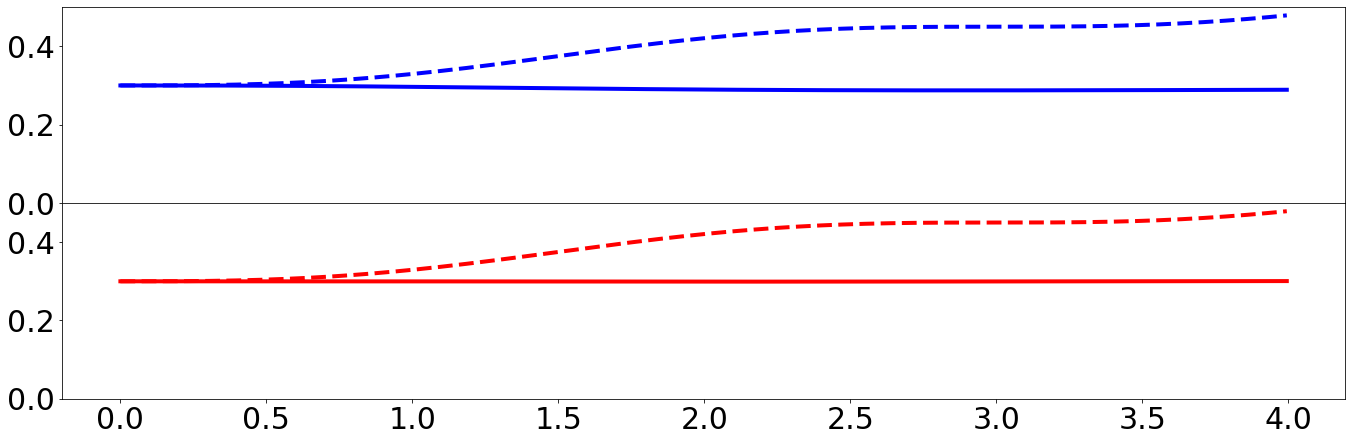

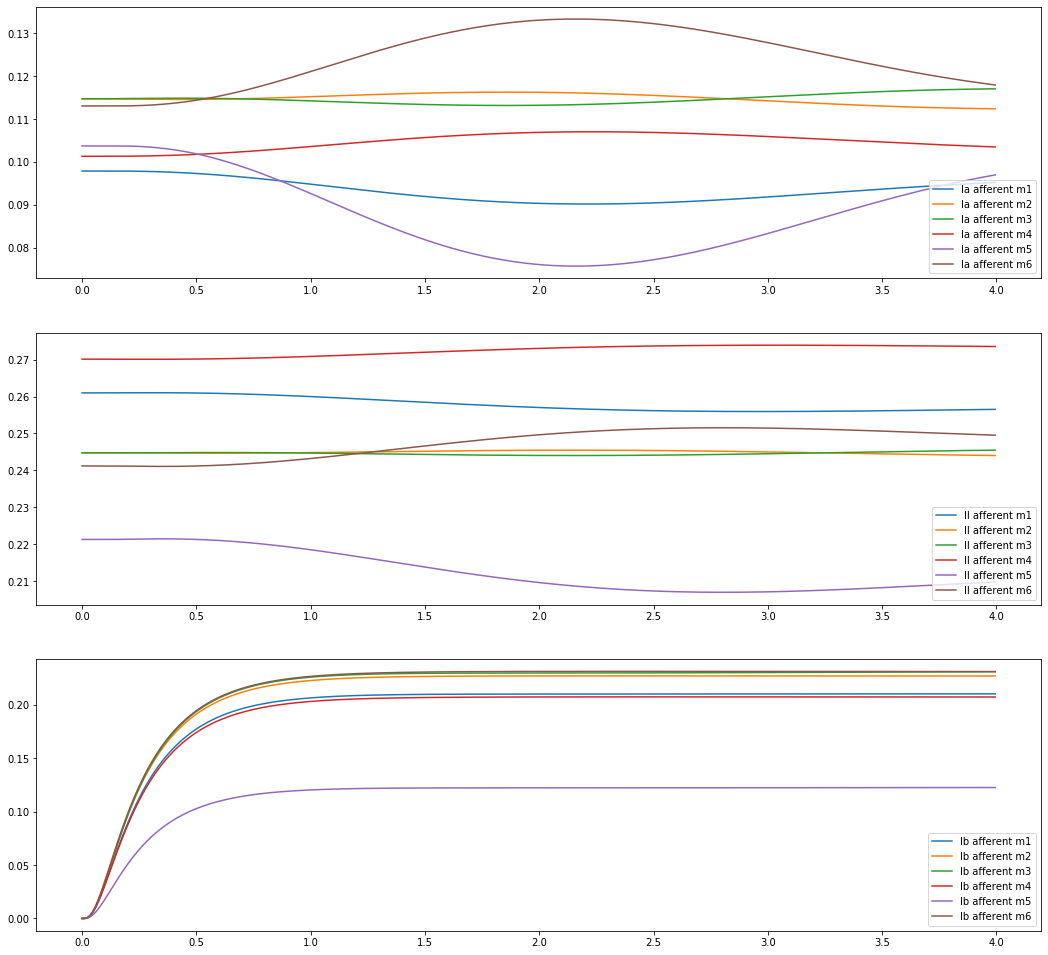

[[3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.044425188408528715, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8911107926678595, -0.8291302846827832, -0.9541391891053229, -0.9563744923051403, -0.9261260537170147, -1.0995948130344706, -2.162239891677011], [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, -0.8372512060543804, 1.115

In [6]:
w = sc.grad_desc()
#print(w)

In [11]:
# Synapse weights for 4 iterations: [1.0, 1.0, 0.5, 0.5]

# (0.45,0.45)
#Iteration 1
#w = [[3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8911107926678595, -0.8291302846827832, -0.9541391891053229, -0.9563744923051403, -0.9261260537170147, -1.0995948130344706, -1.1622398916770107], [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, -0.8372512060543804, 1.115349330181512, -0.8926376634678552, -0.9606014067890095, -1.0037987958821297], [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 0.9768582470168059, -0.9107847920680969, 0.966647299779996, 0.89072415817823, -0.018309063632626188, 0.13917750129811174, 0.04057954870249145], [3.0, 3.0, 3.0, 1.174662379585714, 1.1824144738291922, 0.9568377262635913, 1.143109817793905], [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -1.0322685639185025], [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0047829728710416, -1.1828675575324912, 1.1225184615239185, -1.1031205340348236, 1.1392844387905734, -0.92176405673792, 0.944530745880461, -0.9977194241815663, 0.917668968965553, 1.0640338279798918, -0.9863458593583608, 0.8779264242739213, -1.1472959614818588], [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.8272427265478529], [1.0, 1.0, 1.0, -0.12017333302403843, 1.0, -0.5102438653051973, -0.8483328372520285, -0.8402306952334748, -1.173801727069962, 0.9396707860991443, -1.0064846877495386, 1.1028110469364787, -1.1026067972078948], [-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -1.1083950926558988, -0.9482918713325923, -0.0844691158719415, -0.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [3.0, 1.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 0.015057162646764766, -0.03983207161779817, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, -0.08046234356882379], [-3.0, -3.0, 3.0, 3.0, -3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, -3.0, -0.845108752369458, -1.1546036144462242, 0.8357711942458048, 0.8300825339314496, -0.9645319472530756, 1.1627842153710266, -1.0671218383881333, 1.0829756725808823, -0.9327493561324719, -1.0295028538314182, 0.8139120089211453, -0.9664540803316589, 0.049172787967753484], [-3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, -1.1386834974775626, 0.8979840524539762, 0.9277673398611785, 1.02516750435401, 0.09831001106748927, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.9102865962581], [1.0, 1.0, 1.0, -0.07757993049566014, 1.0, 0.2696761449625127, -0.9932816412269792, -1.0790058904073057, -1.0849765857087106, 1.1172163576388046, -1.1814014890295628, -1.013791039036363, -1.1800404062509589], [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822], [1.0, 1.0, 2.0, 1.0, 2.0, 1.0, -0.10636860063173717, 0.01336229134427952, 0.18690169674238694, 0.06255707641454378, 0.1946783537163505, 0.1506487693752137, 0.09638962594040928], [-3.0, -3.0, 3.0, -3.0, 3.0, 3.0, -3.0, 3.0, 3.0, -0.9983407800106362, -0.8575195947445687, -0.06750768778052971, -1.109371920739637, -0.06363472818475055, -0.07895202201506338, -0.8112526668735782, -0.19787000027555113, -0.09627009060385722, -0.026403491636533438], [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.9167197665136751], [2.0, 2.0, 2.0, 1.0948650113120095, 0.9903886130141438, 0.9509754111675546, 0.9114224706075682], [1.0, -1.0, -1.0, 1.0, 3.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.12657642372260153, 1.1156452219339785, 0.865542617296521, 0.05185509426748264, 0.020453003975285045], [3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 1.0798623568794796], [-1.0, 3.0, -1.0, 1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -0.9015012693932637, 0.9985684136956658, -0.923588366567365, 1.088693878806725, -1.13068629232945, 0.8754089366478497, -1.0723387390364125, -0.9425641866041556, 0.9408058213425513, -0.9941070018731826, -0.9409786655106341, 1.0277798099622828, 1.035721398218348], [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.9701366744912456, 1.1525343826894248, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, -0.8061290858869787], [1.0, 1.0, 0.911141331298305, 1.0, 0.8861789062132357, 1.0, -1.0330067128179696, -0.8818384256269726, -0.8681693233382821, -1.013810300505924, -1.0777207809619849, -0.8095312736194893, -1.0910662729113776], [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1737301039723131, -0.9048983929014287, -0.8926551351669579, -0.8591915757236039, -1.0962309103195707, -1.0621288350476732, -1.1029448933394213, -0.9280454194581185, -0.8125499067347384], [-1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0442560854270846, 0.8414636623546127, -0.9661408416068481, -0.8051148592223745, 1.166254474436637, -1.1481022976848418, 0.8345472733379895, 0.9271177977626888, -1.1952109005534342, 1.0248987521150206, 1.139846445668739, -1.1080186673489523, -0.9198001029069299], [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.9003445763549601, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353], [1.0, 1.0, 0.8655330370398051, 1.0, 0.5530563563206745, 1.0, -1.0478261987351085, -0.8100092265560641, -1.055985045860748, -1.0008997390737044, -1.0323326425964305, -1.1073243934402566, -0.8531930582470737], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
#Iteration 2
#w = [[3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -1.0444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8911107926678595, -0.8291302846827832, -0.9541391891053229, -0.9563744923051403, -0.9261260537170147, -1.0995948130344706, -2.162239891677011], [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, -0.8372512060543804, 1.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.0037987958821297], [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 0.9768582470168059, -0.9107847920680969, 0.966647299779996, 0.89072415817823, -0.018309063632626188, 0.13917750129811174, 0.04057954870249145], [3.0, 3.0, 3.0, 1.174662379585714, 1.1824144738291922, 0.9568377262635913, 1.143109817793905], [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -2.0322685639185023], [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0047829728710416, -1.1828675575324912, 1.1225184615239185, -1.1031205340348236, 1.1392844387905734, -0.92176405673792, 0.944530745880461, -0.9977194241815663, 0.917668968965553, 1.0640338279798918, -0.9863458593583608, 0.8779264242739213, -2.1472959614818588], [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.8272427265478529], [0.0, 0.0, 0.0, -0.12017333302403843, 0.0, -0.5102438653051973, -1.8483328372520285, -1.8402306952334748, -2.173801727069962, 1.9396707860991445, -2.0064846877495386, 2.1028110469364787, -2.102606797207895], [0.0, -1.0, 2.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 1.0150571626467648, 0.9601679283822018, 0.8920603190644242, 0.938000200094641, 0.9342048493666221, 0.9056699137204117, 1.1107638862338194, 1.117366899120925, -0.08046234356882379], [-3.0, -3.0, 2.0, 2.0, -3.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, -3.0, -0.845108752369458, -1.1546036144462242, -0.16422880575419518, -0.1699174660685504, -0.9645319472530756, 0.1627842153710266, -1.0671218383881333, 0.08297567258088234, -0.9327493561324719, -1.0295028538314182, -0.18608799107885465, -0.9664540803316589, -0.9508272120322465], [-3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, -1.1386834974775626, 0.8979840524539762, 0.9277673398611785, 1.02516750435401, 0.09831001106748927, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.9102865962581], [0.0, 0.0, 0.0, -0.07757993049566014, 0.0, 0.2696761449625127, -1.9932816412269792, -2.0790058904073057, -2.0849765857087106, 2.117216357638805, -2.1814014890295628, -2.013791039036363, -2.180040406250959], [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822], [2.0, 0.0, 3.0, 0.0, 1.0, 0.0, -0.10636860063173717, 0.01336229134427952, 0.18690169674238694, 0.06255707641454378, 0.1946783537163505, 0.1506487693752137, 0.09638962594040928], [-3.0, -4.0, 2.0, -4.0, 2.0, 2.0, -4.0, 2.0, 2.0, -1.9983407800106363, -1.8575195947445686, -1.0675076877805296, -2.109371920739637, -1.0636347281847505, -1.0789520220150635, -1.8112526668735782, -1.1978700002755511, -1.0962700906038572, -0.026403491636533438], [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.9167197665136751], [2.0, 2.0, 2.0, 1.0948650113120095, 0.9903886130141438, 0.9509754111675546, 0.9114224706075682], [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.12657642372260153, 1.1156452219339785, 0.865542617296521, 0.05185509426748264, 0.020453003975285045], [3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 1.0798623568794796], [-1.0, 3.0, -1.0, 1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -0.9015012693932637, 0.9985684136956658, -0.923588366567365, 1.088693878806725, -1.13068629232945, 0.8754089366478497, -1.0723387390364125, -0.9425641866041556, 0.9408058213425513, -0.9941070018731826, -0.9409786655106341, 1.0277798099622828, 2.0357213982183477], [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.9701366744912456, 1.1525343826894248, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, -0.8061290858869787], [0.0, 0.0, -0.08885866870169501, 0.0, -0.1138210937867643, 0.0, -0.03300671281796963, 0.11816157437302743, -1.8681693233382821, -0.013810300505924022, -2.077720780961985, 0.1904687263805107, -0.09106627291137759], [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1737301039723131, -0.9048983929014287, -0.8926551351669579, -0.8591915757236039, -1.0962309103195707, -1.0621288350476732, -1.1029448933394213, -0.9280454194581185, 0.18745009326526163], [-1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.0, -1.0, -1.0, 0.0, 2.044256085427085, 1.8414636623546126, -1.966140841606848, -1.8051148592223745, 1.166254474436637, -1.1481022976848418, 0.8345472733379895, 0.9271177977626888, -1.1952109005534342, 1.0248987521150206, 1.139846445668739, -1.1080186673489523, -1.91980010290693], [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.09965542364503988, -0.8563958587092644, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353], [0.0, 0.0, 0.8655330370398051, 0.0, 0.5530563563206745, 0.0, -2.0478261987351085, -1.810009226556064, -2.055985045860748, -2.0008997390737044, -1.0323326425964305, -1.1073243934402566, -0.8531930582470737], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
#Iteration 3
#w = [[3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.5444251884085287, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8911107926678595, -0.8291302846827832, -0.9541391891053229, -0.9563744923051403, -0.9261260537170147, -1.0995948130344706, -2.162239891677011], [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, -0.8372512060543804, 1.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.0037987958821297], [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 0.9768582470168059, -0.9107847920680969, 0.966647299779996, 0.89072415817823, -0.018309063632626188, 0.13917750129811174, 0.04057954870249145], [3.0, 3.0, 3.0, 1.174662379585714, 1.1824144738291922, 0.9568377262635913, 1.143109817793905], [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -2.0322685639185023], [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0047829728710416, -1.1828675575324912, 1.1225184615239185, -1.1031205340348236, 1.1392844387905734, -0.92176405673792, 0.944530745880461, -0.9977194241815663, 0.917668968965553, 1.0640338279798918, -0.9863458593583608, 0.8779264242739213, -2.1472959614818588], [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.8272427265478529], [0.0, 0.0, 0.0, -0.12017333302403843, 0.0, -0.010243865305197275, -1.8483328372520285, -1.8402306952334748, -2.173801727069962, 2.4396707860991445, -2.5064846877495386, 2.6028110469364787, -2.602606797207895], [0.5, -1.0, 2.5, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 0.8916705547275723, 1.0, 3.0, 0.13226350114820606, 1.3915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [4.5, 2.0, 4.5, 2.5, 4.5, 2.5, 4.5, 3.0, 1.5150571626467648, 1.4601679283822018, 1.392060319064424, 1.438000200094641, 0.9342048493666221, 0.9056699137204117, 1.1107638862338194, 1.117366899120925, -0.08046234356882379], [-3.0, -3.0, 1.5, 1.5, -3.0, 1.5, -3.0, 1.5, -3.0, -3.0, 1.5, -3.0, -0.845108752369458, -1.1546036144462242, -0.6642288057541952, -0.6699174660685504, -0.9645319472530756, 0.1627842153710266, -1.0671218383881333, 0.08297567258088234, -0.9327493561324719, -1.0295028538314182, -0.18608799107885465, -0.9664540803316589, -1.4508272120322465], [-3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, -1.1386834974775626, 0.8979840524539762, 0.9277673398611785, 1.02516750435401, 0.09831001106748927, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.9102865962581], [0.0, 0.0, 0.0, -0.07757993049566014, 0.0, 0.2696761449625127, -1.9932816412269792, -2.0790058904073057, -2.0849765857087106, 2.617216357638805, -2.6814014890295628, -2.013791039036363, -2.180040406250959], [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822], [1.5, 0.0, 2.5, 0.0, 0.5, 0.0, -0.10636860063173717, 0.01336229134427952, 0.18690169674238694, 0.06255707641454378, 0.1946783537163505, 0.1506487693752137, 0.09638962594040928], [-3.0, -4.0, 1.5, -3.5, 1.5, 1.5, -4.0, 1.5, 1.5, -1.9983407800106363, -1.8575195947445686, -0.5675076877805296, -1.6093719207396369, -0.5636347281847505, -0.5789520220150635, -1.8112526668735782, -0.6978700002755511, -0.5962700906038572, -0.026403491636533438], [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.9167197665136751], [2.0, 2.0, 2.0, 1.0948650113120095, 0.9903886130141438, 0.9509754111675546, 0.9114224706075682], [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.12657642372260153, 1.1156452219339785, 0.865542617296521, 0.05185509426748264, 0.020453003975285045], [3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 1.0798623568794796], [-1.0, 3.0, -1.0, 1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -0.9015012693932637, 0.9985684136956658, -0.923588366567365, 1.088693878806725, -1.13068629232945, 0.8754089366478497, -1.0723387390364125, -0.9425641866041556, 0.9408058213425513, -0.9941070018731826, -0.9409786655106341, 1.0277798099622828, 2.0357213982183477], [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.9701366744912456, 1.1525343826894248, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, -0.8061290858869787], [-0.5, 0.0, -0.08885866870169501, -0.5, -0.6138210937867643, 0.0, -0.5330067128179696, 0.6181615743730274, -2.3681693233382823, -0.513810300505924, -2.577720780961985, 0.6904687263805107, 0.4089337270886224], [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [0.5, -0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, -1.6737301039723131, -1.4048983929014287, -1.392655135166958, -1.359191575723604, -1.0962309103195707, -1.0621288350476732, -1.1029448933394213, -0.9280454194581185, 0.18745009326526163], [-0.5, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.0, -1.0, -1.0, 0.0, 2.044256085427085, 1.8414636623546126, -1.466140841606848, -1.8051148592223745, 1.166254474436637, -1.1481022976848418, 0.8345472733379895, 0.9271177977626888, -1.1952109005534342, 1.0248987521150206, 1.139846445668739, -1.1080186673489523, -1.41980010290693], [-2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.4003445763549601, -0.8563958587092644, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353], [-0.5, -0.5, 1.365533037039805, -0.5, 0.053056356320674514, -0.5, -2.5478261987351085, -2.310009226556064, -1.5559850458607478, -2.5008997390737044, -0.5323326425964305, -1.6073243934402566, -0.8531930582470737], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
#Iteration 4
#w = [[3.0, -3.0, -3.0, 3.0, 1.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 0.8191766038891397, -0.044425188408528715, -0.8374785419747472, 0.8644072837025059, 1.097448453897015, -0.9468103352927333, -1.0703279929079745, 1.1689506129618912, -0.10510942453533022, -0.8704217716443223, -0.8997571438626237, 0.8455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, -0.8267784495816788, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8911107926678595, -0.8291302846827832, -0.9541391891053229, -0.9563744923051403, -0.9261260537170147, -1.0995948130344706, -2.162239891677011], [-1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.1351350547174703, -1.1525537532193437, 1.1188938967060833, 1.1796017069915812, -1.1407748494360626, -0.8372512060543804, 1.115349330181512, -0.8926376634678552, -0.9606014067890095, -2.0037987958821297], [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 0.9768582470168059, -0.9107847920680969, 0.966647299779996, 0.89072415817823, -0.018309063632626188, 0.13917750129811174, 0.04057954870249145], [3.0, 3.0, 3.0, 1.174662379585714, 1.1824144738291922, 0.9568377262635913, 1.143109817793905], [3.0, -3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 1.8371200427756724, 3.0, 3.0, 1.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 3.0, -3.0, 2.8750446706415755, 3.0, 3.0, 1.8112507817961032, 1.0471434958222976, -3.0, -0.04092280440811402, 1.083329868397066, -1.1481936661473469, -1.0584814458520746, 0.9617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -1.1368078498324763, 0.1680118584056915, -0.8863080899493665, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.1985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -1.139130577380255, -0.9891761992052648, -1.0082379205335068, -1.1631240253647102, -1.5322685639185023], [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0047829728710416, -1.1828675575324912, 1.1225184615239185, -1.1031205340348236, 1.1392844387905734, -0.92176405673792, 0.944530745880461, -0.9977194241815663, 0.917668968965553, 1.0640338279798918, -0.9863458593583608, 0.8779264242739213, -2.1472959614818588], [3.0, -3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.1447622718201962, -0.8087884421532121, 1.152874650350254, 1.0109436681985136, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.8272427265478529], [0.0, 0.0, 0.0, 0.37982666697596157, -0.5, 0.4897561346948027, -1.3483328372520285, -1.3402306952334748, -1.673801727069962, 2.9396707860991445, -3.0064846877495386, 3.1028110469364787, -2.602606797207895], [1.0, -1.0, 3.0, 2.0, -2.0, -1.0, 1.0, 4.0, 1.0, 1.0, -2.0, 1.0, -2.0, -1.0, 1.0, 3.0, 1.0, -1.0, -0.8270424204343145, 1.0, 3.0, -0.8185440755241489, -0.35621647773244014, -1.0, -0.46269845274783217, 1.0, -1.0, 1.3916705547275723, 1.0, 3.0, 0.13226350114820606, 0.8915890404699183, -3.0, 0.3456844217230248, -1.177289379152752, -2.1083950926558988, -0.9482918713325923, -0.0844691158719415, -1.8019139160353692, -1.0327593183889325, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, -0.8128951473089685, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [4.5, 2.0, 4.5, 2.5, 4.5, 2.5, 4.5, 3.0, 1.5150571626467648, 1.4601679283822018, 1.392060319064424, 1.438000200094641, 0.9342048493666221, 0.9056699137204117, 1.1107638862338194, 1.117366899120925, -0.08046234356882379], [-3.0, -3.0, 1.0, 1.0, -3.0, 1.0, -3.0, 1.0, -3.0, -3.0, 1.0, -3.0, -0.845108752369458, -1.1546036144462242, -1.1642288057541952, -1.1699174660685503, -0.9645319472530756, -0.3372157846289734, -1.0671218383881333, -0.41702432741911766, -0.9327493561324719, -1.0295028538314182, -0.18608799107885465, -0.9664540803316589, -1.9508272120322465], [-3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, -1.1386834974775626, 0.8979840524539762, 0.9277673398611785, 1.02516750435401, 0.09831001106748927, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.9102865962581], [0.0, 0.0, 0.0, -0.07757993049566014, 0.0, 0.2696761449625127, -1.4932816412269792, -2.0790058904073057, -2.0849765857087106, 3.117216357638805, -2.1814014890295628, -2.013791039036363, -2.180040406250959], [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.5, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, -0.8159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, 0.04912979996411329, -0.9196532843053767, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.8972039165588197, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822], [1.0, 0.0, 2.0, 0.0, 0.0, 0.0, -0.10636860063173717, 0.01336229134427952, 0.18690169674238694, 0.06255707641454378, 0.1946783537163505, 0.1506487693752137, 0.09638962594040928], [-3.0, -4.0, 1.0, -3.5, 1.0, 1.0, -4.0, 1.0, 1.0, -2.4983407800106363, -2.3575195947445686, -0.06750768778052962, -2.109371920739637, -0.06363472818475047, -0.07895202201506346, -1.8112526668735782, -0.19787000027555113, -0.09627009060385716, -0.026403491636533438], [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 1.136232866224695, 1.056992213834325, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.9167197665136751], [2.0, 2.0, 2.0, 1.0948650113120095, 0.9903886130141438, 0.9509754111675546, 0.9114224706075682], [0.0, -1.0, -1.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 3.0, 0.8014692157564789, 0.9710032376503226, -1.0, 0.26698208986846783, 1.0, -1.0, -0.36846659631618683, 1.0, 1.0, -0.3938181244658674, 0.5872304460977609, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 1.0, 1.0, -1.049878998519036, 0.842348224624485, 1.074922619046688, -1.1814153248120884, -1.1340915478297486, 0.9604699324446442, 0.9585221128008135, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 1.1754046419296738, -0.19597102488152873, 0.05925915915054686, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 1.1753739071291067, -0.15815018526826347, 0.8385901947808441, 0.04738415529429055, -0.12657642372260153, 1.1156452219339785, 0.865542617296521, 0.05185509426748264, 0.020453003975285045], [3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.1538549600422079, 0.8450759899378378, 1.057934933100933, 1.013828429715045, 1.060633850774345, 0.9819155345830798, 0.8431967683913815, 0.8601341172510081, 1.0798623568794796], [-1.0, 3.0, -1.0, 1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -1.0, -1.0, 3.0, -0.9015012693932637, 0.9985684136956658, -0.923588366567365, 1.088693878806725, -1.13068629232945, 0.8754089366478497, -1.0723387390364125, -0.9425641866041556, 0.9408058213425513, -0.9941070018731826, -0.9409786655106341, 1.0277798099622828, 2.0357213982183477], [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.9701366744912456, 1.1525343826894248, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, -0.8061290858869787], [0.0, -0.5, 0.411141331298305, -0.5, -1.1138210937867643, 0.0, -1.0330067128179696, 0.11816157437302743, -2.8681693233382823, -1.013810300505924, -3.077720780961985, 0.1904687263805107, -0.09106627291137759], [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, 3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.03097772129928389, 0.3661871325734971, -3.0, -0.22197160888265577, 3.0, -3.0, 2.7149654801655982, 3.0, 3.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 3.0, -3.0, 0.9328384213500818, 3.0, 3.0, -1.1015138358665681, -0.9747895331696267, 1.1983252320898046, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, 0.9326073402585904, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [0.5, -0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 0.5, -1.6737301039723131, -1.9048983929014287, -0.892655135166958, -1.359191575723604, -1.0962309103195707, -1.0621288350476732, -1.1029448933394213, -0.9280454194581185, 0.18745009326526163], [0.0, -1.0, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, 2.544256085427085, 1.3414636623546126, -1.966140841606848, -2.3051148592223747, 0.666254474436637, -1.6481022976848418, 0.3345472733379895, 0.42711779776268877, -1.6952109005534342, 0.5248987521150206, 0.6398464456687389, -1.6080186673489523, -0.91980010290693], [-2.0, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.09965542364503988, -0.3563958587092644, 0.652304583714661, 0.6546564579368124, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.6454785815457136], [0.0, -0.5, 0.8655330370398051, -0.5, 0.053056356320674514, -0.5, -3.0478261987351085, -2.810009226556064, -2.055985045860748, -3.0008997390737044, -1.0323326425964305, -2.1073243934402566, -0.8531930582470737], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


Error: 22.47410703859874


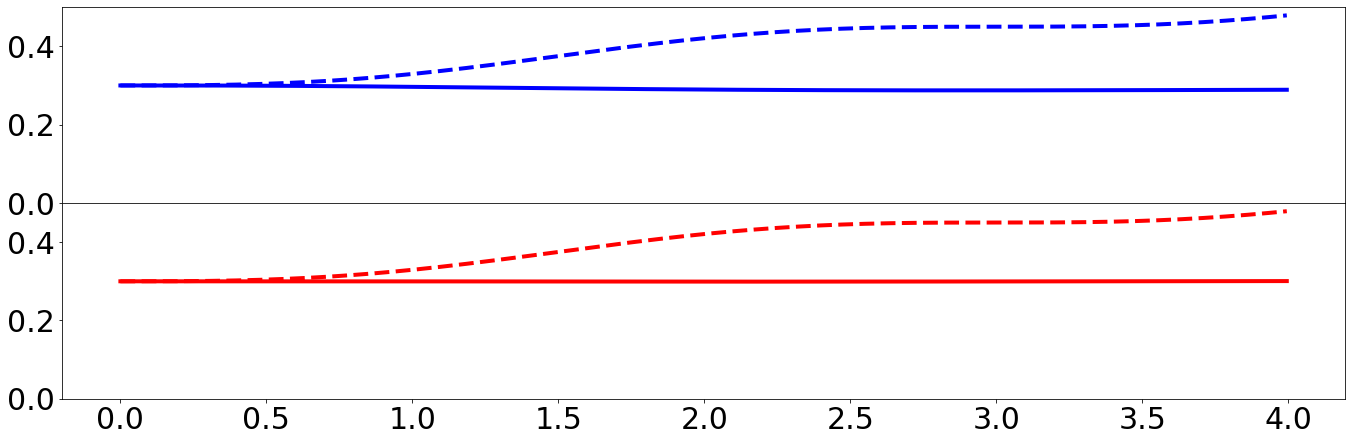

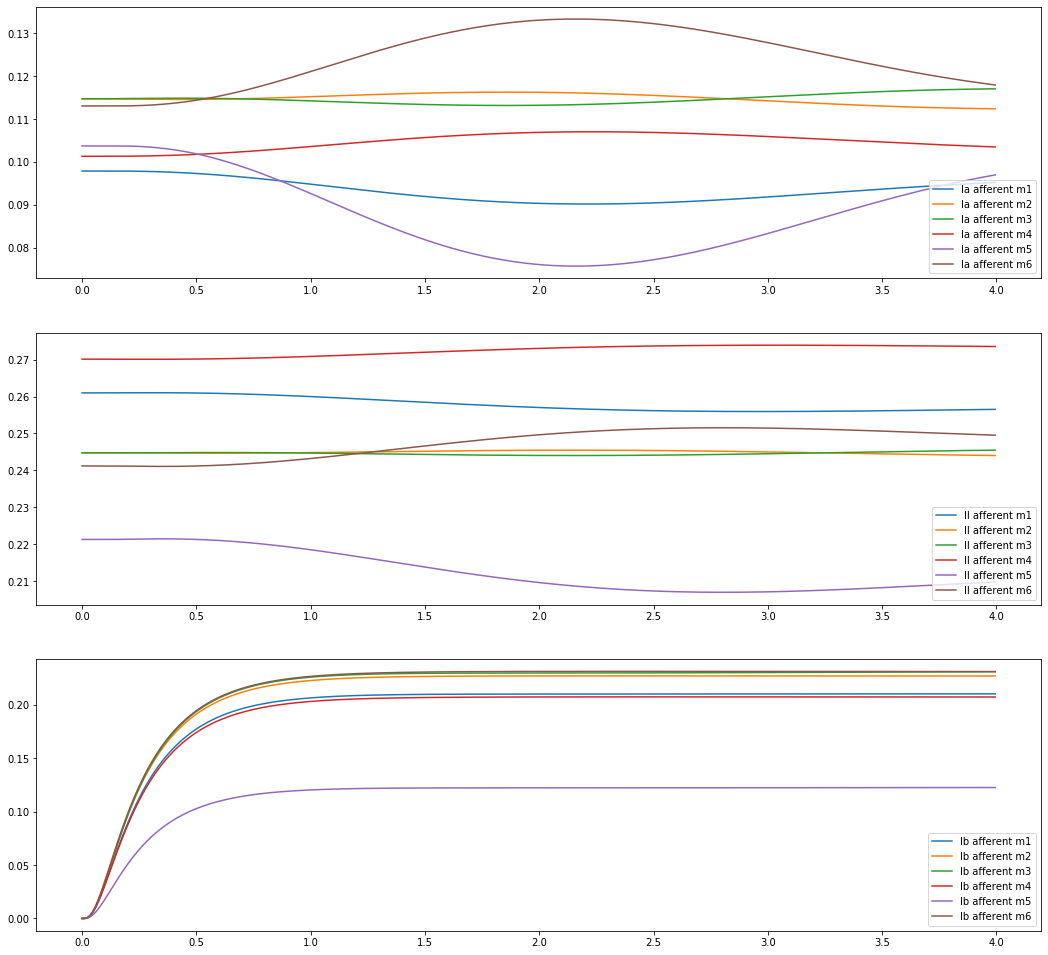

In [7]:
sc.initialize()
sc.update_w(w)
sc.simulate(4.)
error = sc.calc_error(0.45,0.45,4.)
print('Error: ' + str(error))
sc.arm_trajectory(0.45,0.45,4.)
sc.arm_afferent_output()

In [ ]:
w = sc.w_list()
print(w)

In [ ]:
syn_idx = sc.syn_list()
print(syn_idx)

In [ ]:
for slist in sc.net.syns:
    for syn in slist:
        pre_type = sc.net.units[syn.preID].type.name
        post_type = sc.net.units[syn.postID].type.name
        print("%s (%d) --> %s (%d), port:%d" %(pre_type, syn.preID, post_type, syn.postID, syn.port))